## ** A New Non-intrusive Load Monitoring Method for Residential Appliances **

- Author : Gyubaek Kim (database.kim@yonsei.ac.kr)
- Description
  * NILM performance was evaluated in terms of precision, recall, accuracy, and F1 score, which are commonly used performance indicators for classification models, and whether the results satisfied the target level.
- License
   * All rights reserved. No part of this code may be reproduced or transmitted in any form or by any means, or utilized by any information storage and retrieval system without written permission from the copyright owner. You can use this source code for free projects only. I will not allow commercial use of this code. I am not allowing anyone to modify any or all parts of the source code for commercial purposes. By using my source code, you agree to the following: 
       * 1. You will not distribute any or all parts of this source code for commercial use 
       * 2. You will cite me as the original creator of this source code. 
       * 3. You will inform me of its use before you use any or all parts of this source code. 
   For use of any or all parts of this source code, email me. This source code is provided free to use for everybody provided this is used non-commercially. Violators of this agreement will be subject to legal action by the author. If you see commercial applications or software using any or all parts of this source code, inform me.

In [4]:
#### NIMLTK as common framework ####
from nilmtk.utils import find_nearest
from nilmtk.feature_detectors import cluster
from nilmtk.legacy.disaggregate import Disaggregator
from nilmtk.datastore import HDFDataStore
from nilmtk import DataSet

#### Benchmark Resource ####
from benchmark.rnndisaggregator import RNNDisaggregator
from benchmark.grudisaggregator import GRUDisaggregator
from benchmark.windowgrudisaggregator import WindowGRUDisaggregator
from benchmark.daedisaggregator import DAEDisaggregator
from benchmark.shortseq2pointdisaggregator import ShortSeq2PointDisaggregator
from benchmark.metrics import recall_precision_accuracy_f1, relative_error_total_energy, mean_absolute_error

from work.benchmark.rnndisaggregator_fe import RNNDisaggregatorFE
from work.benchmark.grudisaggregator_fe import GRUDisaggregatorFE
from work.benchmark.windowgrudisaggregator_fe import WindowGRUDisaggregatorFE
from work.benchmark.daedisaggregator_fe import DAEDisaggregatorFE
from work.benchmark.shortseq2pointdisaggregator_fe import ShortSeq2PointDisaggregatorFE

#### Our Model ####
from work.dtdisaggregator import DTDisaggregator
from work.utils import checkSimilarity

import pandas as pd
import numpy as np
import h5py
import numpy.random
import time
import datetime
import math
import itertools
import warnings

from scipy.signal import find_peaks

from matplotlib import rcParams
import matplotlib.pyplot as plt

numpy.random.seed(42)
warnings.filterwarnings('ignore')

%matplotlib inline
rcParams['figure.figsize'] = (23, 10)

#### Configuration

In [5]:
###############################################################
# Common
###############################################################
TRAIN_SAMPLE_PERIOD = 6
TEST_SAMPLE_PERIOD = 6

EPOCHS = 1

DATA_FILE = 'data/enertalk.h5'

T_S = '2016-11-01'
T_E = '2016-12-31'
P_S = '2017-01-01'
P_E = '2017-01-31'

HOME_ID = 1
appliances = ['television', 'washing machine', 'rice cooker', 'water filter', 'microwave']

In [6]:
# start_time, end_time : YYYY-MM-DD HH:MI:SS
def disaggregate(dataset, model, appliance, start_time, end_time, evaluate=False):
    
    dataset.set_window(start=start_time, end=end_time)
    
    test_elec = dataset.buildings[HOME_ID].elec    
    test_mains = test_elec.all_meters()[0]   
    test_meter = test_elec.submeters()[appliance]
    
    tempfile = 'work/temp/' + str(time.time())
    
    output = HDFDataStore(tempfile, 'w')    
    model.disaggregate(test_mains, output, test_meter, sample_period=TEST_SAMPLE_PERIOD)
    output.close()
    
    result = DataSet(tempfile)    
    res_elec = result.buildings[HOME_ID].elec

    predicted = res_elec[appliance] 
    
    ground_truth = None
   
    if evaluate == True:
        
        ground_truth = test_elec[appliance]

        # Performance Metric
        rpaf = recall_precision_accuracy_f1(predicted, ground_truth)
        print("============ Recall: {}".format(rpaf[0]))
        print("============ Precision: {}".format(rpaf[1]))
        print("============ Accuracy: {}".format(rpaf[2]))
        print("============ F1 Score: {}".format(rpaf[3]))

    return predicted

## [1] Performance Evaluation with results (precision, recall, accuracy and f1)

- Description
  However, the proposed method was implemented in the form of a regression model in NILMTK to be able to compare its performance with those 
  of other methods. Thus, it returns prediction results as a time-series of data, which had to then be converted into a classification 
  result. A successful prediction was defined as electricity being consumed by an appliance when it was predicted to be consumed and when 
  the predicted value was higher than a threshold of 10 watts. This threshold was used not to reflect false use, such as a device consuming 
  insignificant amounts of power in a standby state.

********************
[DRF-television]
********************


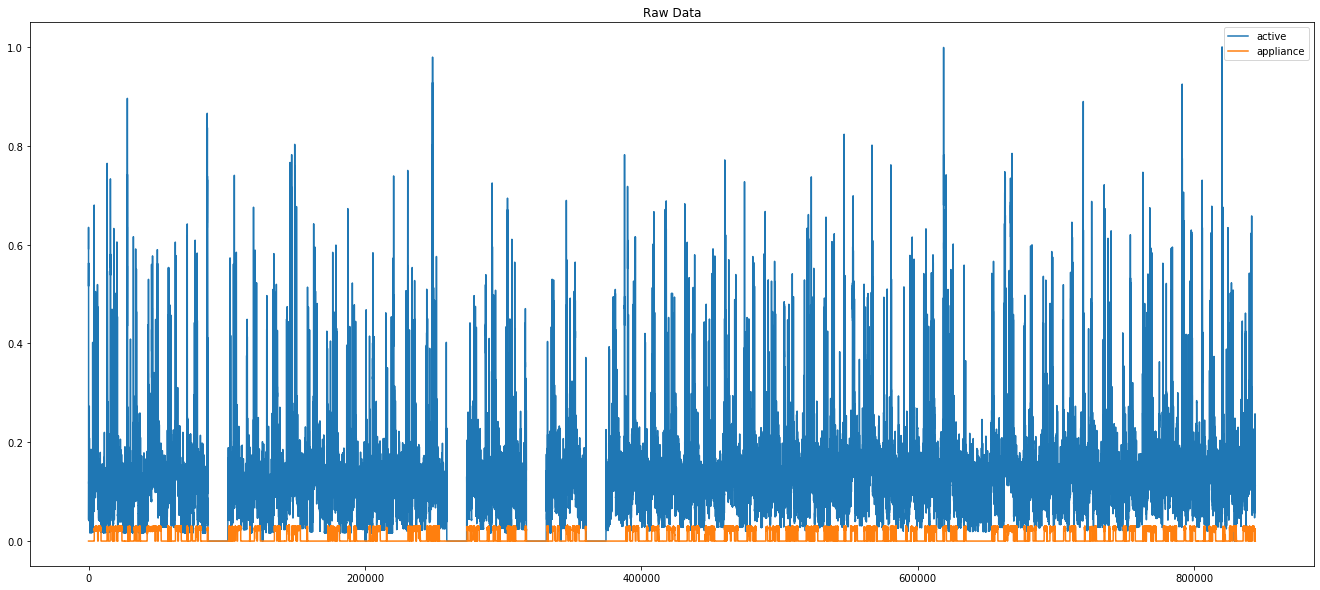

feature selection is done..
model fit is done..
min     0.245783
diff    0.112706
f5      0.055096
std     0.047968
max     0.035830
a9      0.031614
f4      0.026471
f6      0.026406
f3      0.025764
f7      0.025653
a1      0.025015
a0      0.024928
a8      0.024852
f8      0.023916
f2      0.023866
f1      0.022929
f9      0.022868
a7      0.021511
a2      0.021349
q0      0.021327
a6      0.020681
a3      0.020630
a4      0.020197
q2      0.019804
q1      0.018711
a5      0.017969
f0      0.008120
mean    0.008038
dtype: float64


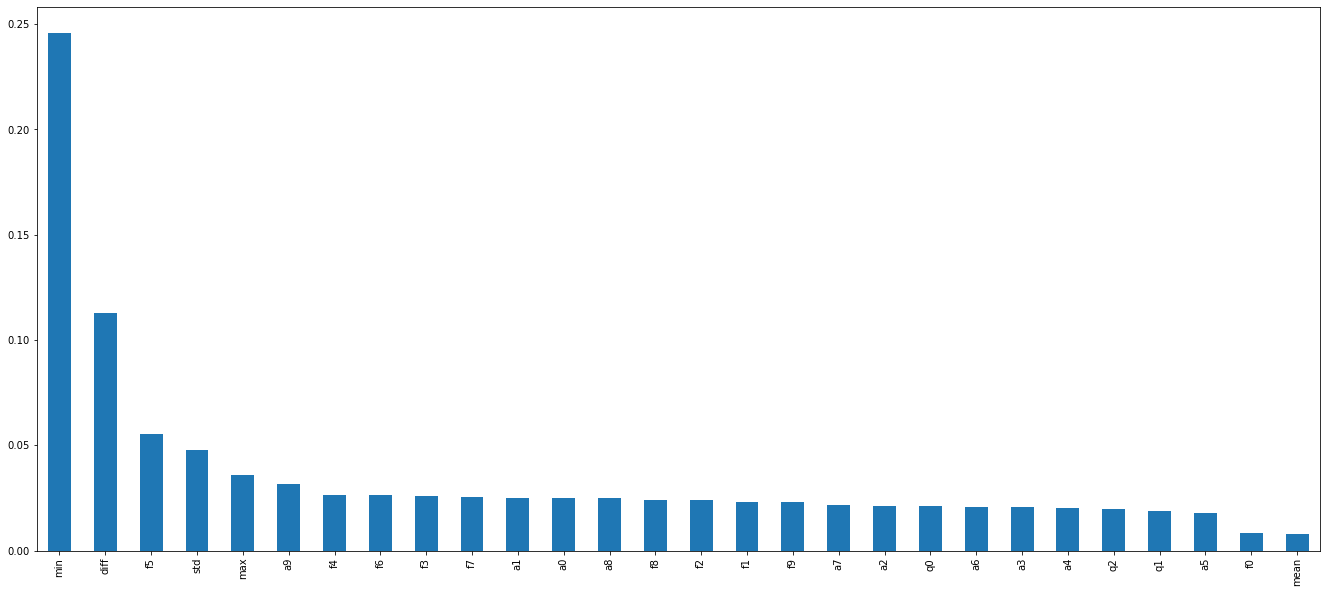

train on chunk is done..
elapsed time (secs) = 4182.038337945938
New sensible chunk: 87506
feature selection is done..
New sensible chunk: 134869
feature selection is done..
New sensible chunk: 119473
feature selection is done..
New sensible chunk: 28957
feature selection is done..
New sensible chunk: 55356
feature selection is done..
Disaggregation is done..
============ Recall: 0.9693542475446746
============ Precision: 0.4336791379425741
============ Accuracy: 0.5932836959148858
============ F1 Score: 0.5992568940761925
********************
[DRF-washing machine]
********************


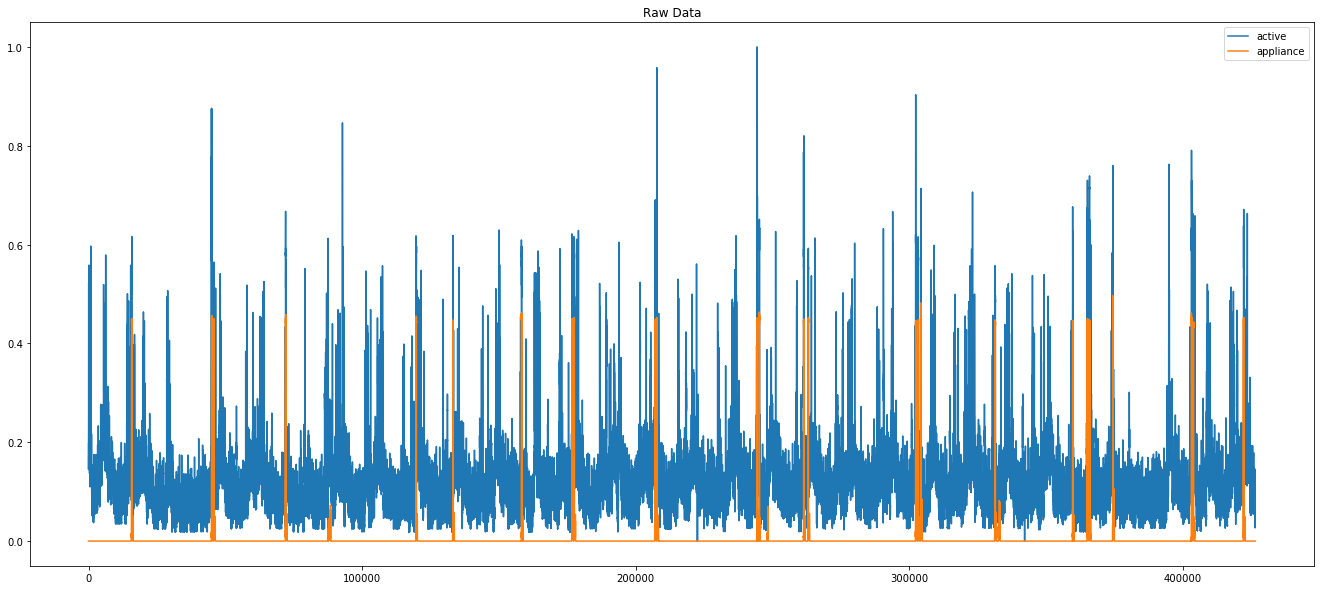

feature selection is done..
model fit is done..
min     0.866684
diff    0.043230
a9      0.025134
std     0.007638
max     0.007356
q0      0.004745
a0      0.004036
f5      0.003973
a8      0.003148
q2      0.002731
q1      0.002401
a1      0.002338
f6      0.002327
f4      0.002195
f9      0.002025
a7      0.001977
f1      0.001948
a3      0.001872
f3      0.001735
f7      0.001630
a4      0.001560
a6      0.001548
f2      0.001539
a2      0.001484
f8      0.001443
a5      0.001372
f0      0.001141
mean    0.000792
dtype: float64


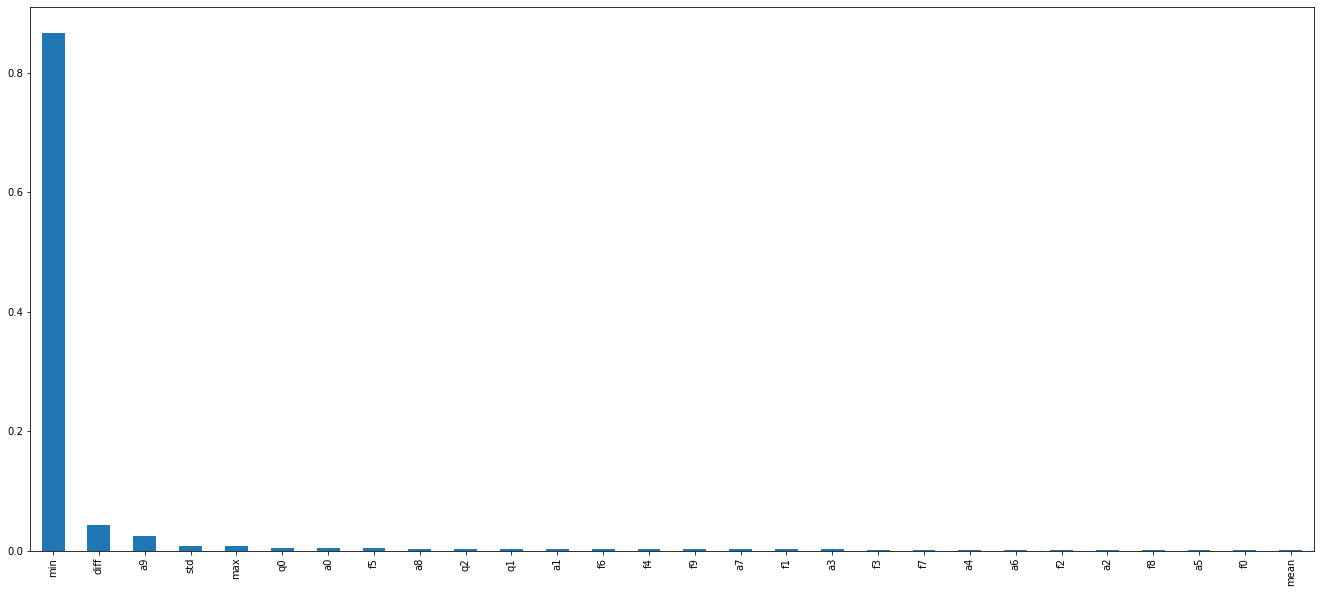

train on chunk is done..
elapsed time (secs) = 3633.638522386551
New sensible chunk: 87506
feature selection is done..
New sensible chunk: 134869
feature selection is done..
New sensible chunk: 119473
feature selection is done..
New sensible chunk: 28957
feature selection is done..
New sensible chunk: 55356
feature selection is done..
Disaggregation is done..
============ Recall: 0.8750664540138224
============ Precision: 0.832574607991907
============ Accuracy: 0.9867185098449632
============ F1 Score: 0.8532918610679109
********************
[DRF-rice cooker]
********************


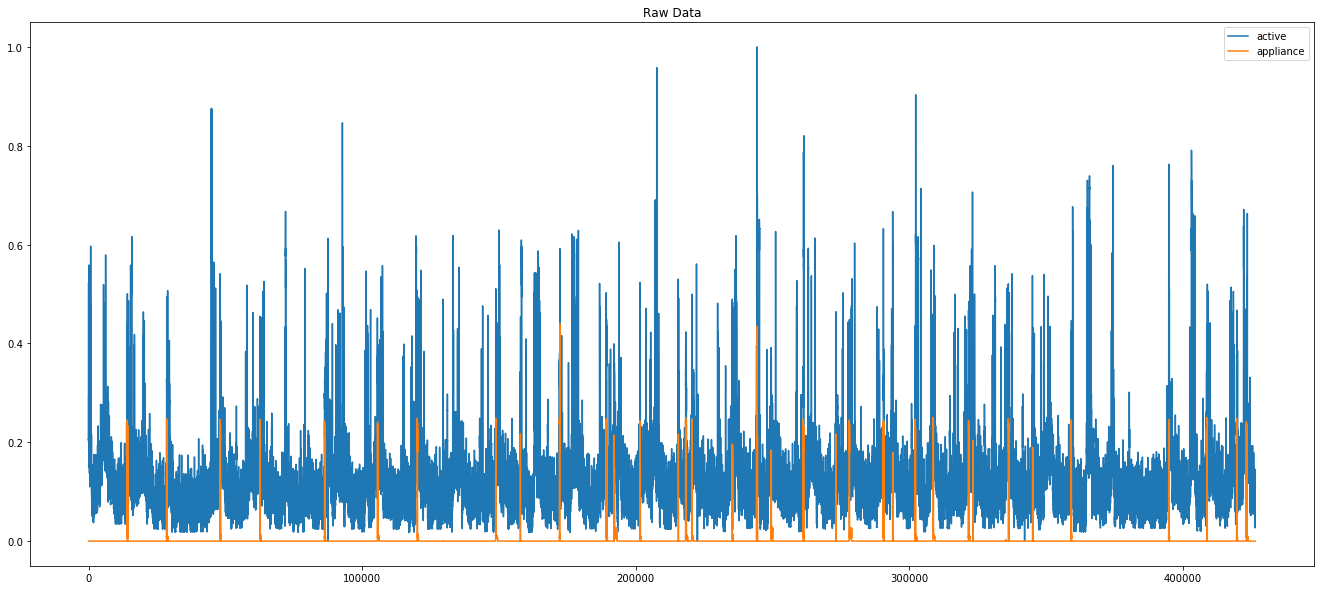

feature selection is done..
model fit is done..
a9      0.514814
min     0.086934
diff    0.065465
a1      0.064918
std     0.049692
max     0.026177
a8      0.018324
q2      0.015796
f5      0.012981
a0      0.012388
q0      0.011954
q1      0.010668
f9      0.008378
f6      0.008361
f1      0.008286
f4      0.008088
f7      0.007422
f3      0.007181
f0      0.007140
a2      0.007005
a7      0.007004
f2      0.006637
a6      0.006384
f8      0.006359
mean    0.006026
a4      0.005341
a3      0.005294
a5      0.004982
dtype: float64


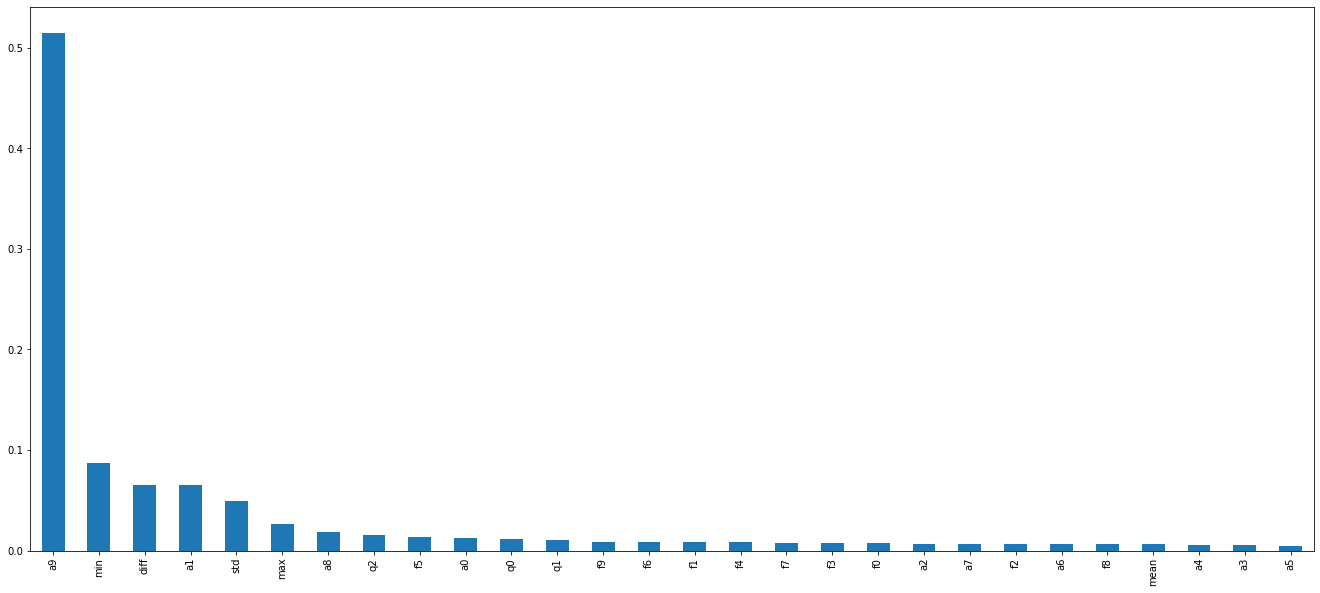

train on chunk is done..
elapsed time (secs) = 3409.8722698688507
New sensible chunk: 87506
feature selection is done..
New sensible chunk: 134869
feature selection is done..
New sensible chunk: 119473
feature selection is done..
New sensible chunk: 28957
feature selection is done..
New sensible chunk: 55356
feature selection is done..
Disaggregation is done..
============ Recall: 0.8608606688407188
============ Precision: 0.8281865157480315
============ Accuracy: 0.9883399779893326
============ F1 Score: 0.844207556043267
********************
[DRF-water filter]
********************


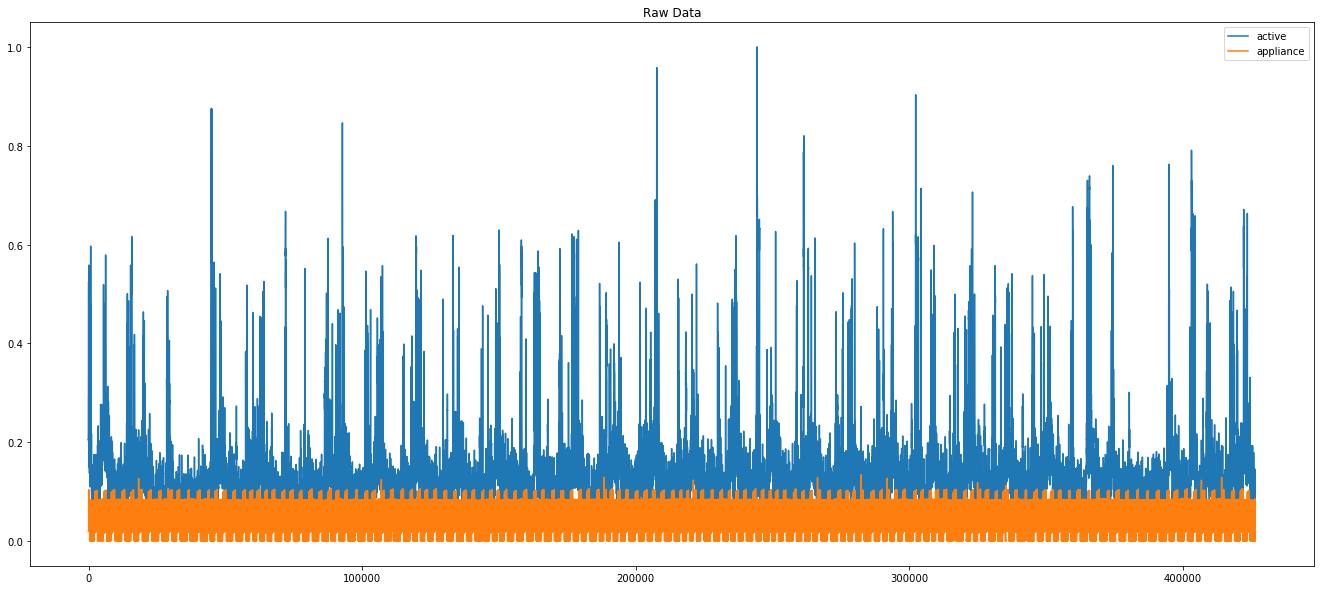

feature selection is done..
model fit is done..
a9      0.220431
min     0.148913
diff    0.126695
max     0.073332
a0      0.035709
std     0.033114
q0      0.030011
f5      0.029070
a8      0.024050
q2      0.021633
a1      0.021266
q1      0.018772
a7      0.016680
a2      0.015819
a6      0.015334
a3      0.014837
f6      0.014477
f4      0.014456
f9      0.014423
f1      0.014328
a4      0.014070
f7      0.013505
f2      0.013485
f8      0.013411
f3      0.013322
a5      0.013215
mean    0.008061
f0      0.007581
dtype: float64


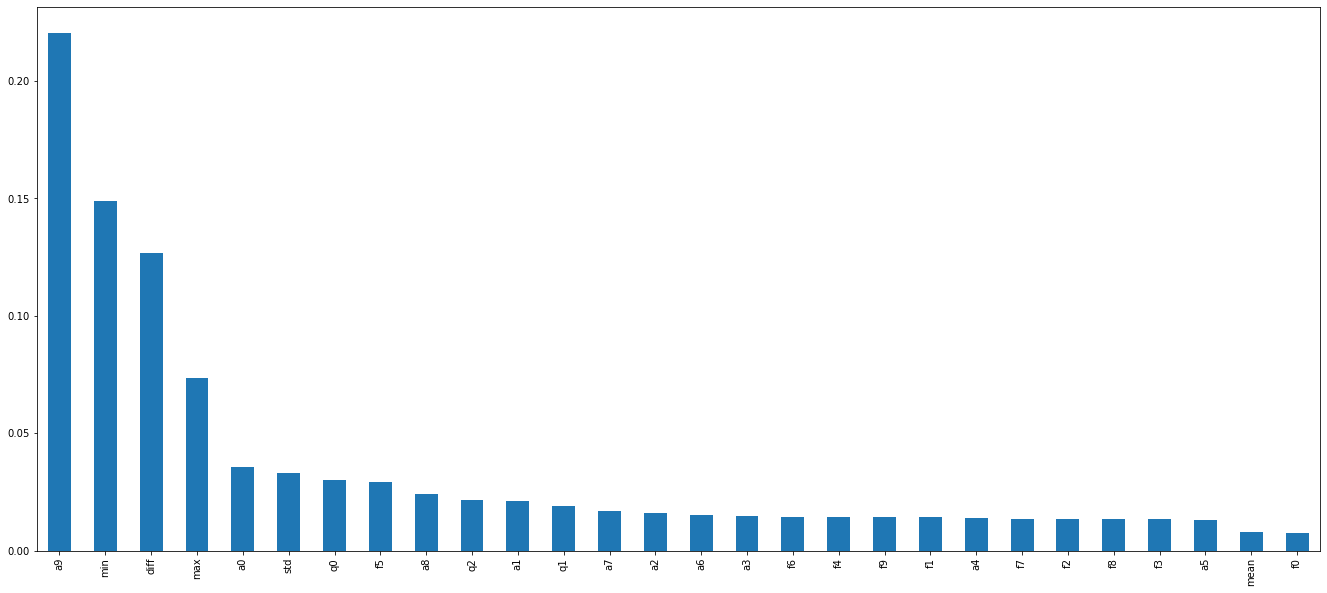

train on chunk is done..
elapsed time (secs) = 2128.837853193283
New sensible chunk: 87506
feature selection is done..
New sensible chunk: 134869
feature selection is done..
New sensible chunk: 119473
feature selection is done..
New sensible chunk: 28957
feature selection is done..
New sensible chunk: 55356
feature selection is done..
Disaggregation is done..
============ Recall: 0.9962064776399936
============ Precision: 0.5771607090093589
============ Accuracy: 0.6995825482157983
============ F1 Score: 0.7308799138983891
********************
[DRF-microwave]
********************


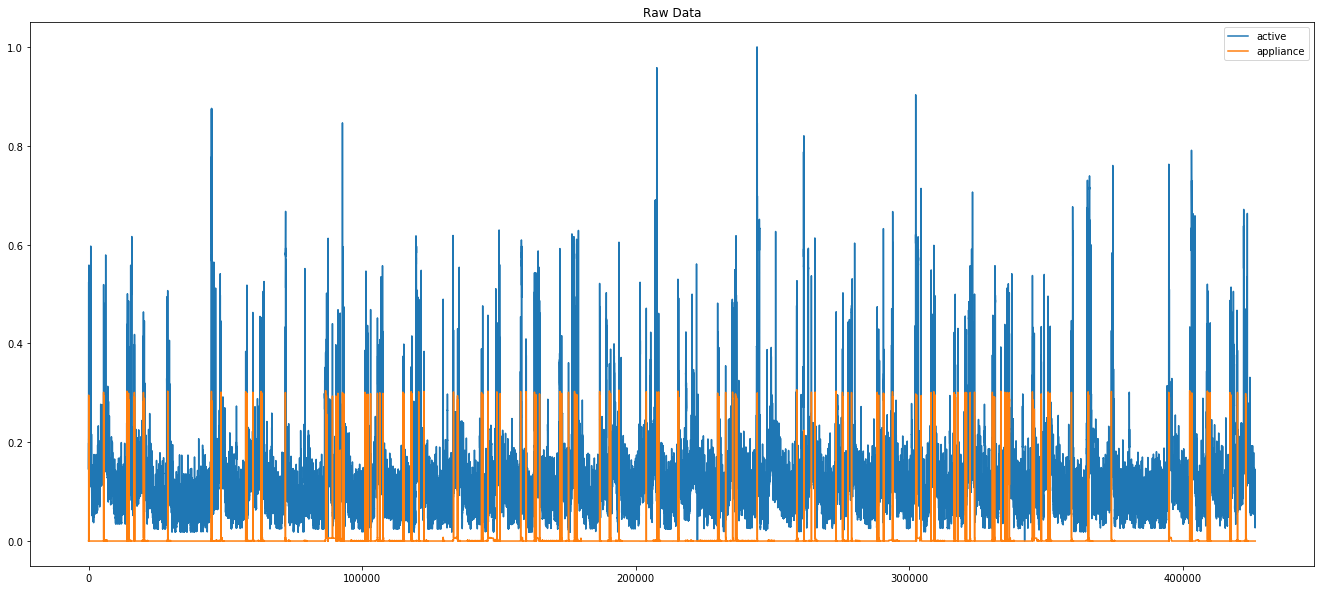

feature selection is done..
model fit is done..
diff    0.354222
a9      0.155450
f4      0.068588
f6      0.054104
a8      0.035728
min     0.033936
f5      0.031739
std     0.028880
max     0.027721
q0      0.025556
a1      0.024725
a7      0.012974
q2      0.012735
a0      0.012531
f2      0.011784
f8      0.011396
a6      0.010518
f3      0.010378
f9      0.010310
f1      0.010053
f7      0.009966
q1      0.009832
a2      0.009716
a3      0.007532
a5      0.005838
a4      0.005759
mean    0.004152
f0      0.003876
dtype: float64


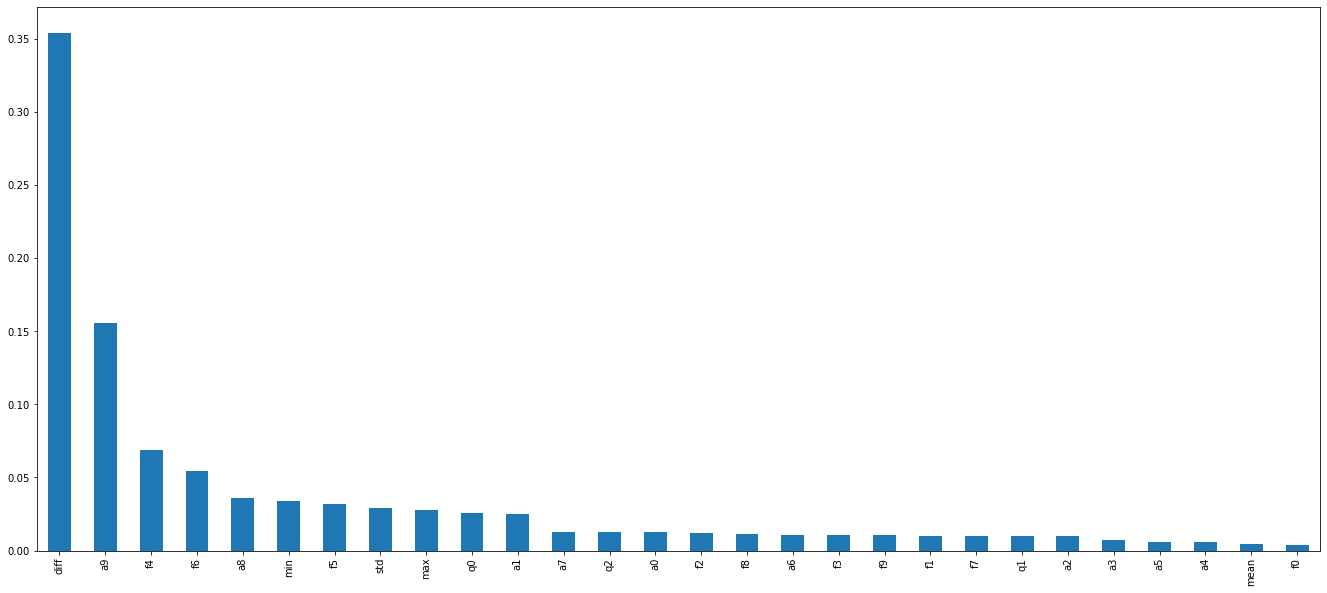

train on chunk is done..
elapsed time (secs) = 3459.6212968826294
New sensible chunk: 87506
feature selection is done..
New sensible chunk: 134869
feature selection is done..
New sensible chunk: 119473
feature selection is done..
New sensible chunk: 28957
feature selection is done..
New sensible chunk: 55356
feature selection is done..
Disaggregation is done..
============ Recall: 0.9131244064577398
============ Precision: 0.8936723919994052
============ Accuracy: 0.9879222915498279
============ F1 Score: 0.9032936888187437


In [4]:
T_S = '2016-11-01'
T_E = '2016-12-31'
P_S = '2017-01-01'
P_E = '2017-01-31'

dataset = DataSet(DATA_FILE)
dataset.set_window(start=T_S, end=T_E)

train_elec = dataset.buildings[HOME_ID].elec
train_mains = train_elec.all_meters()[0] # The aggregated meter that provides the input

for aname in appliances:
    
    train_meter = train_elec.submeters()[aname]
    
    models = {}
    
    models['DRF-' + aname] = DTDisaggregator(algorithm='DRF', use_feature=True, reactive=False)
    
    for mname, model in models.items():
        
        try:
            
            print("*"*20)
            print("[" + mname + "]") 
            print("*" *20)

            start = time.time()
            model.train(train_mains, train_meter, epochs=EPOCHS, sample_period=TRAIN_SAMPLE_PERIOD)
            end = time.time()            
            print("elapsed time (secs) = " + str(end-start))

            disaggregate(dataset, model, aname, P_S, P_E, True)
        
        except Exception as e:
            print('train & test error', e)
  

********************
[DRF-television]
********************


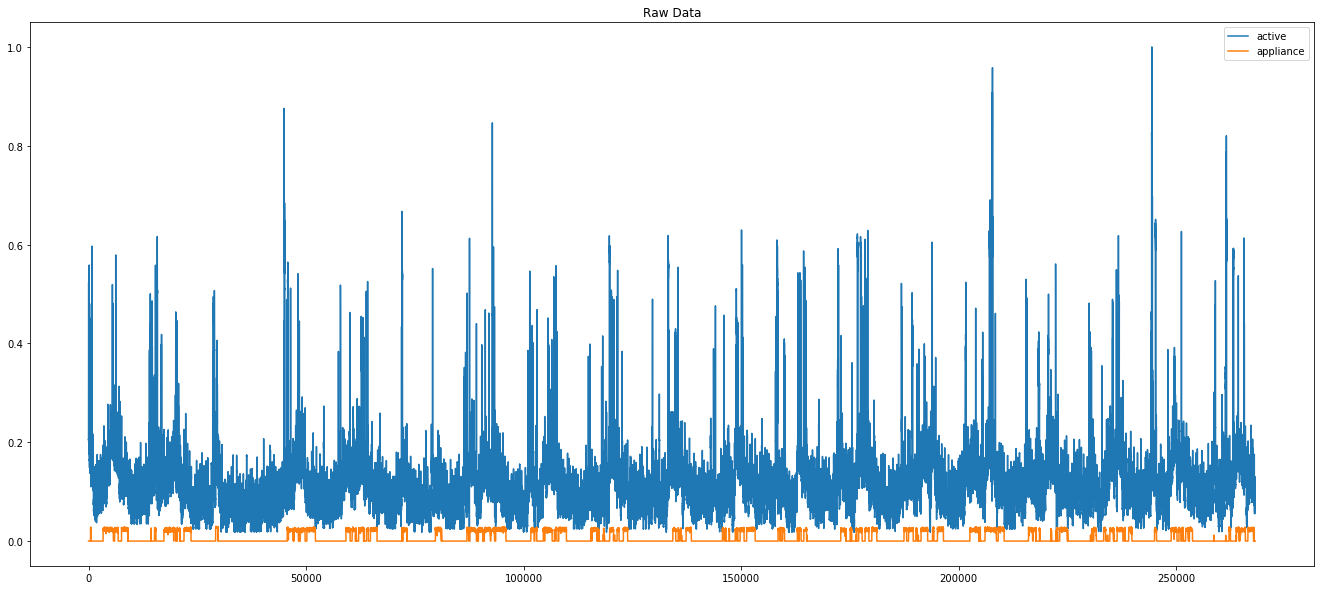

feature selection is done..
model fit is done..
min     0.247586
diff    0.129353
f5      0.060684
std     0.046963
max     0.040628
a9      0.030497
f6      0.028418
f4      0.027956
f7      0.025938
f3      0.025915
a0      0.024181
f2      0.023577
f8      0.023395
q0      0.022658
a1      0.021969
a8      0.021842
f1      0.021724
f9      0.021690
q1      0.020909
q2      0.019081
a2      0.017515
a7      0.017479
a3      0.016657
a6      0.016476
a4      0.016300
a5      0.014581
f0      0.008169
mean    0.007860
dtype: float64


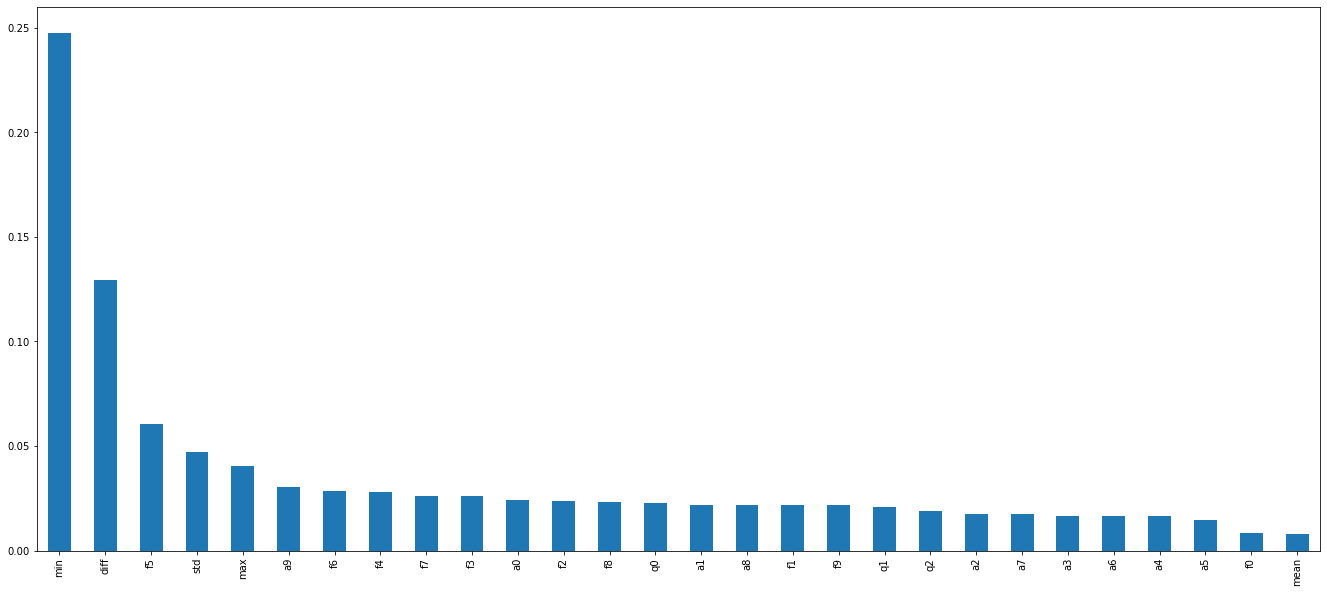

train on chunk is done..
elapsed time (secs) = 1226.947968006134
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.9554298116425083
============ Precision: 0.550685788321494
============ Accuracy: 0.6308333333333334
============ F1 Score: 0.698673619771001
********************
[DRF-washing machine]
********************


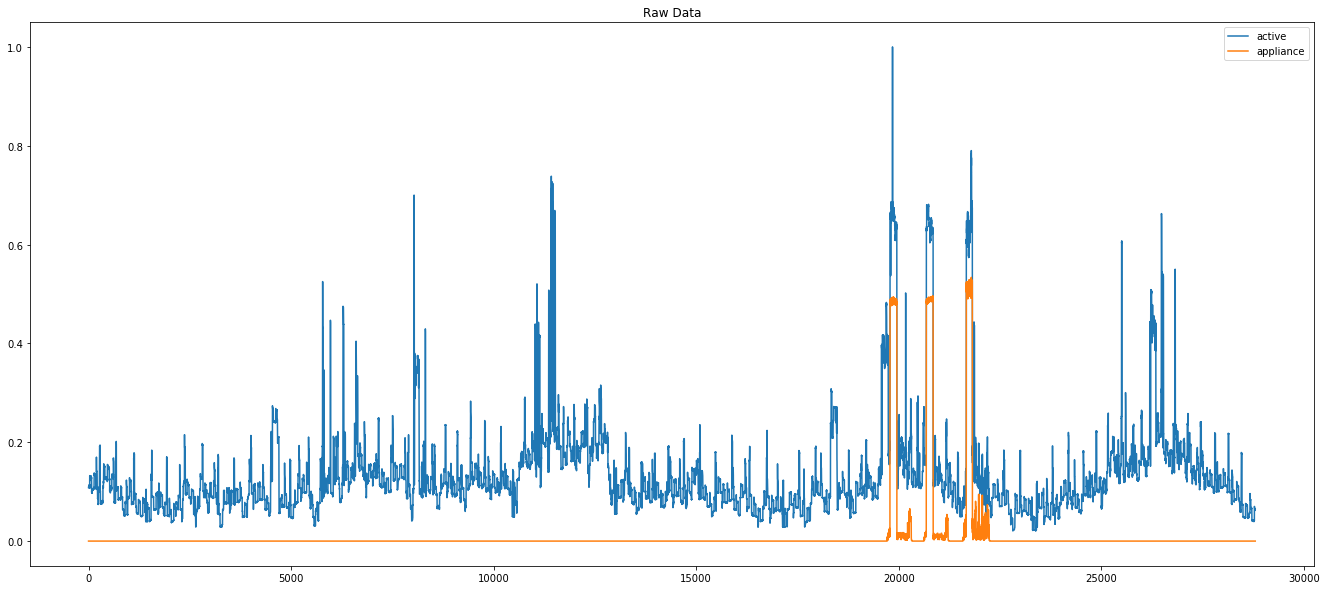

feature selection is done..
model fit is done..
min     0.864894
q0      0.037881
a9      0.036175
f5      0.021169
diff    0.005176
a0      0.005122
f3      0.003880
std     0.003645
f7      0.003411
max     0.002957
a1      0.002021
a8      0.001955
f1      0.001247
a6      0.001179
a4      0.001160
q2      0.000922
f9      0.000881
a2      0.000829
f6      0.000825
a7      0.000713
f4      0.000648
f0      0.000592
mean    0.000533
a3      0.000529
f2      0.000477
f8      0.000431
a5      0.000421
q1      0.000324
dtype: float64


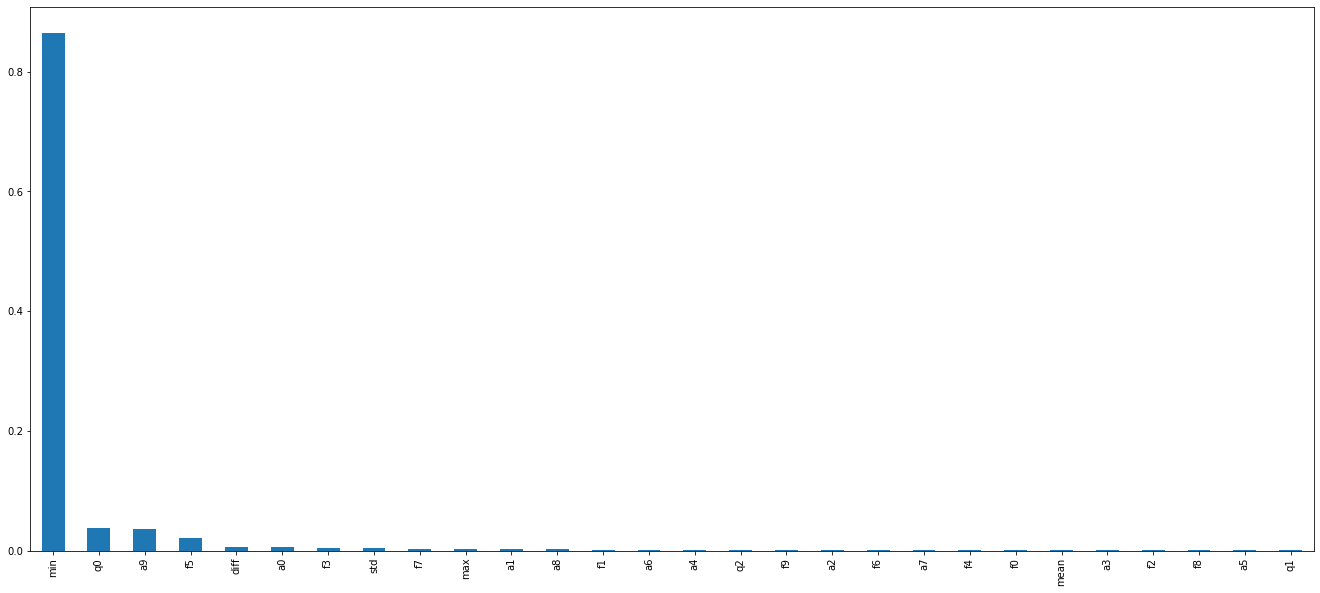

train on chunk is done..
elapsed time (secs) = 154.35512351989746
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.9294429708222812
============ Precision: 0.8406909788867563
============ Accuracy: 0.9838541666666667
============ F1 Score: 0.8828420256991686
********************
[DRF-rice cooker]
********************


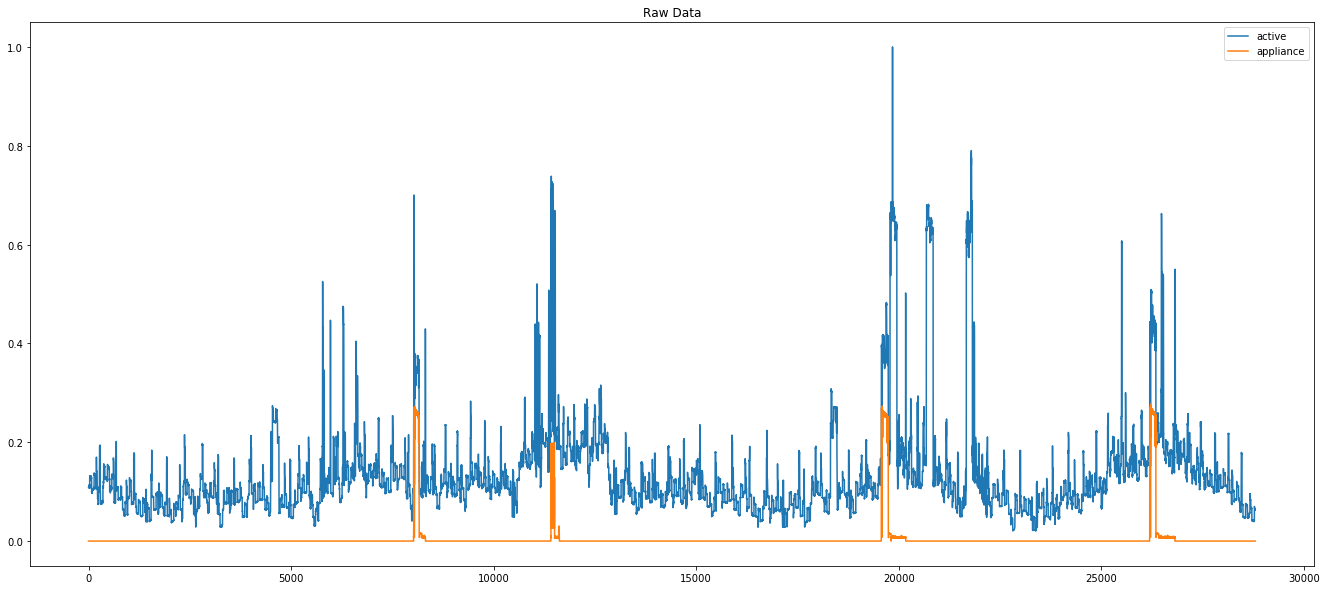

feature selection is done..
model fit is done..
a9      0.458862
max     0.253817
std     0.051925
diff    0.039165
min     0.034219
a0      0.029827
a1      0.023713
a8      0.021588
q1      0.010027
a7      0.009438
q2      0.009057
q0      0.006978
f5      0.006185
f4      0.005120
a5      0.004436
f3      0.004372
a2      0.004358
f7      0.003930
f6      0.003739
f9      0.002952
f2      0.002553
a4      0.002494
f1      0.002490
f8      0.002412
a6      0.002318
a3      0.002144
mean    0.001015
f0      0.000864
dtype: float64


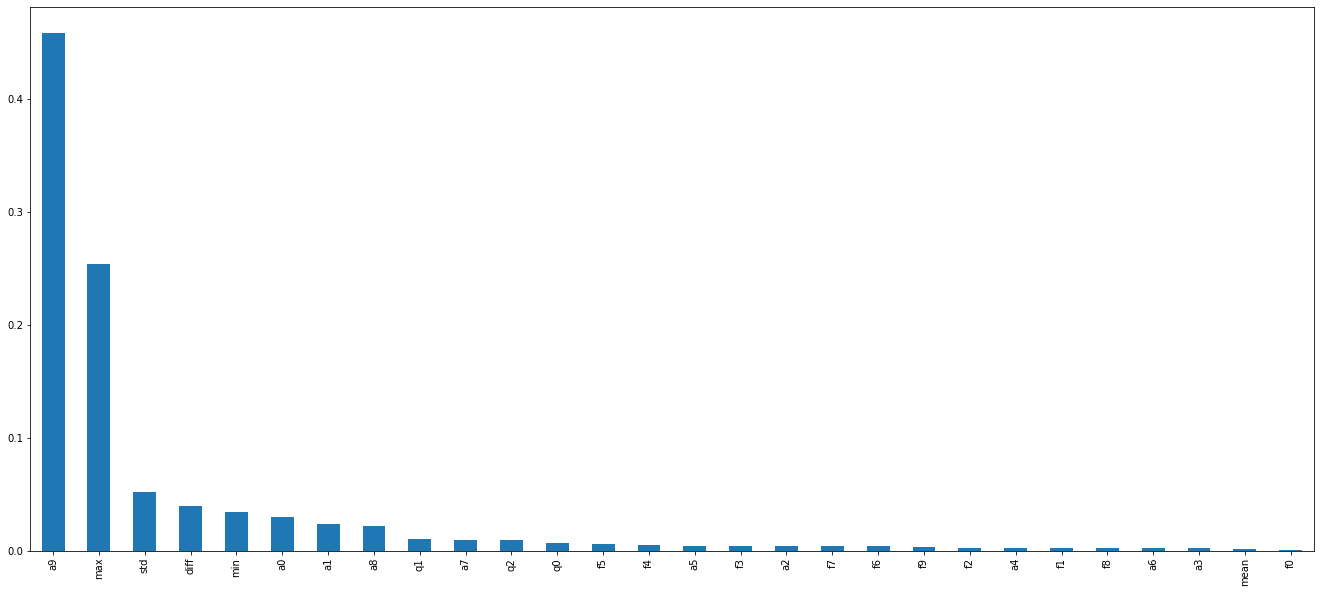

train on chunk is done..
elapsed time (secs) = 134.85230469703674
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.9389978213507625
============ Precision: 0.9007314524555904
============ Accuracy: 0.9895138888888889
============ F1 Score: 0.9194666666666667
********************
[DRF-water filter]
********************


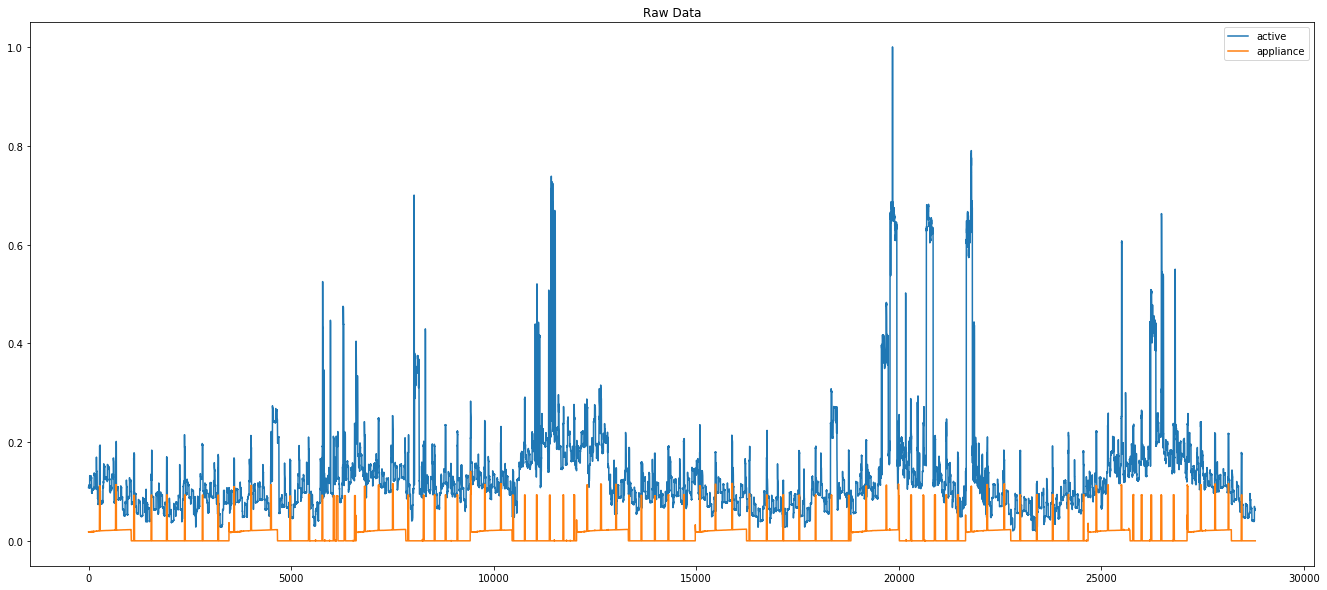

feature selection is done..
model fit is done..
a9      0.223821
diff    0.118159
a0      0.108809
max     0.082464
min     0.077889
std     0.040136
q0      0.034673
q2      0.028973
a8      0.026264
f5      0.024494
a1      0.023945
q1      0.018243
a7      0.015517
a2      0.014450
f4      0.013274
a3      0.012600
f3      0.012415
f7      0.012345
f1      0.012231
f6      0.012188
a6      0.012159
f9      0.011896
a4      0.011740
f2      0.010903
a5      0.010822
f8      0.010739
f0      0.009667
mean    0.009182
dtype: float64


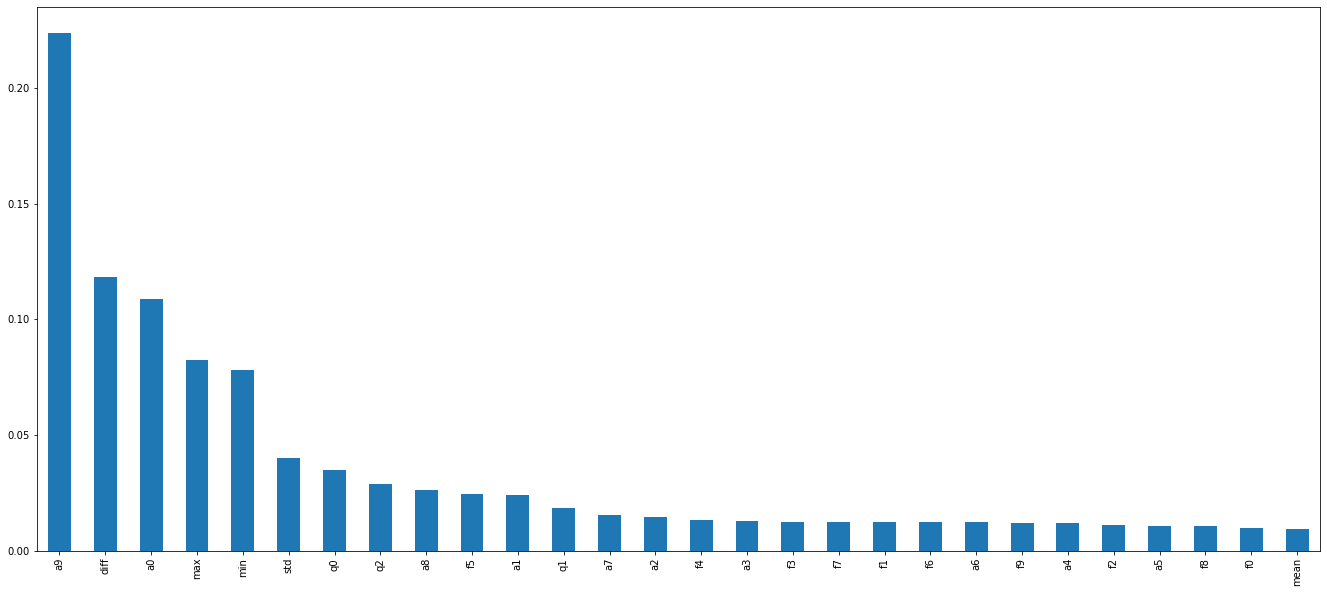

train on chunk is done..
elapsed time (secs) = 94.3591148853302
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.996921619701634
============ Precision: 0.6669835234474017
============ Accuracy: 0.7796875
============ F1 Score: 0.7992406264831514
********************
[DRF-microwave]
********************


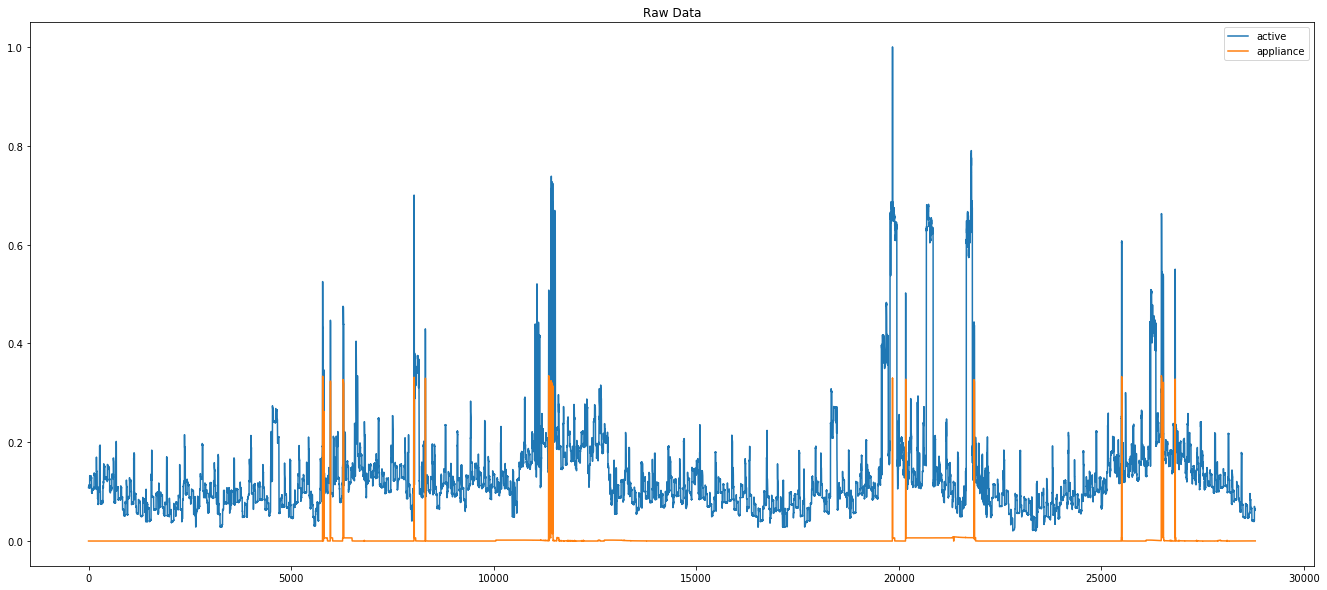

feature selection is done..
model fit is done..
diff    0.344143
a9      0.216797
std     0.064447
f5      0.053576
min     0.037391
max     0.035195
q1      0.023444
f4      0.021783
a1      0.020568
q0      0.019911
a8      0.019806
a7      0.017228
a6      0.016889
f6      0.015510
f3      0.009916
f2      0.009618
q2      0.009463
f7      0.009278
f9      0.009050
f8      0.007505
a0      0.007498
f1      0.006470
a3      0.005175
a4      0.004448
a2      0.003994
mean    0.003868
f0      0.003607
a5      0.003418
dtype: float64


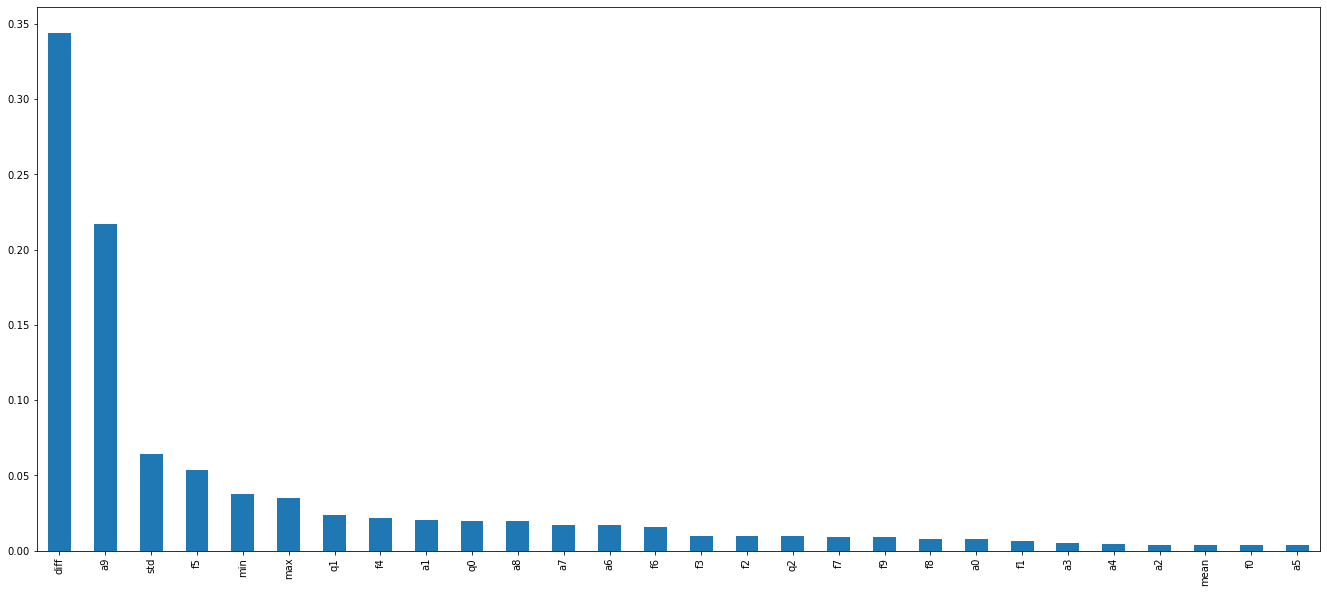

train on chunk is done..
elapsed time (secs) = 136.46346807479858
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.9506314580941446
============ Precision: 0.9394856278366112
============ Accuracy: 0.9899652777777778
============ F1 Score: 0.9450256800456533


In [7]:
T_S = '2017-01-01'
T_E = '2017-01-20'
P_S = '2017-01-21'
P_E = '2017-01-23'

dataset = DataSet(DATA_FILE)
dataset.set_window(start=T_S, end=T_E)

train_elec = dataset.buildings[HOME_ID].elec
train_mains = train_elec.all_meters()[0] # The aggregated meter that provides the input

for aname in appliances:
    
    train_meter = train_elec.submeters()[aname]
    
    models = {}
    
    models['DRF-' + aname] = DTDisaggregator(algorithm='DRF', use_feature=True, reactive=False)
    
    for mname, model in models.items():
        
        try:
            
            print("*"*20)
            print("[" + mname + "]") 
            print("*" *20)

            start = time.time()
            model.train(train_mains, train_meter, epochs=EPOCHS, sample_period=TRAIN_SAMPLE_PERIOD)
            end = time.time()            
            print("elapsed time (secs) = " + str(end-start))

            disaggregate(dataset, model, aname, P_S, P_E, True)
        
        except Exception as e:
            print('train & test error', e)

## [2] Concurrent Occurrences (multi-label classification)

- Description
  The issue is whether the proposed method could produce models that could detect multiple appliances operating at the same time. According 
  to the model architecture, each NILM model can only identify a single appliance at a time, so it was hypothesized that building a model 
  for each appliance would enable multi-label classification.

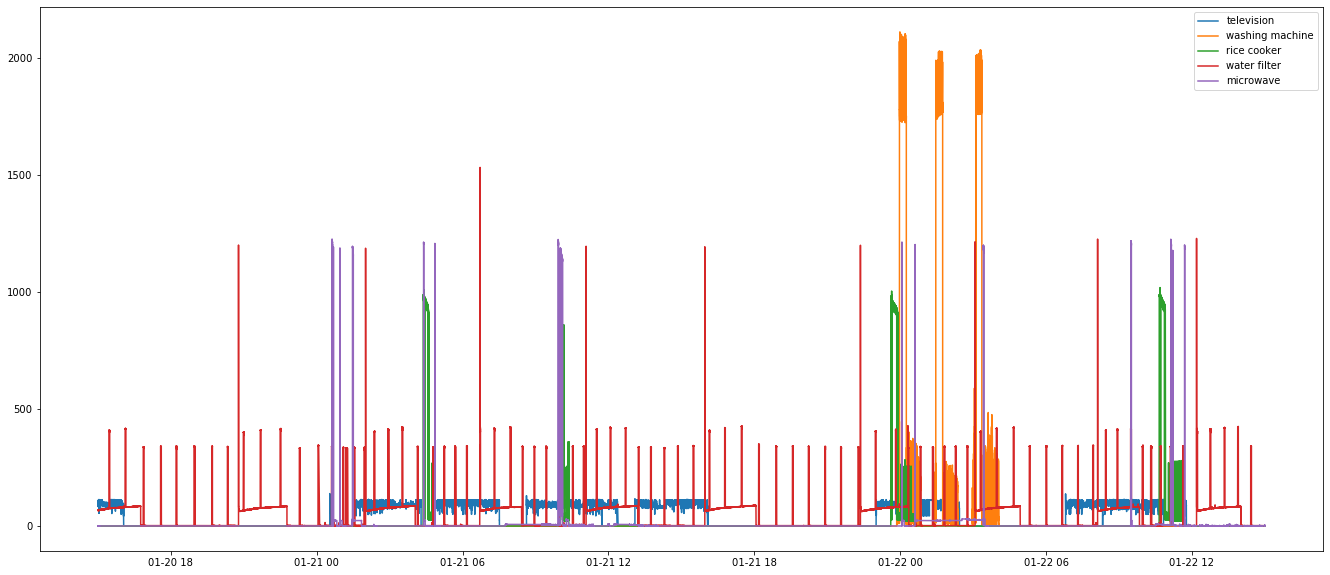

In [5]:
T_S = '2017-01-01'
T_E = '2017-01-20'
P_S = '2017-01-21'
P_E = '2017-01-23'

# ground truth graph
dataset = DataSet(DATA_FILE)
dataset.set_window(start=P_S, end=P_E)

test_elec = dataset.buildings[HOME_ID].elec    
test_meter1 = test_elec['television'].power_series_all_data()
test_meter2 = test_elec['washing machine'].power_series_all_data()
test_meter3 = test_elec['rice cooker'].power_series_all_data()
test_meter4 = test_elec['water filter'].power_series_all_data()
test_meter5 = test_elec['microwave'].power_series_all_data()

plt.plot(test_meter1)
plt.plot(test_meter2)
plt.plot(test_meter3)
plt.plot(test_meter4)
plt.plot(test_meter5)
plt.legend(['television', 'washing machine', 'rice cooker', 'water filter', 'microwave'])    
plt.show()

********************
[DRF-television]
********************


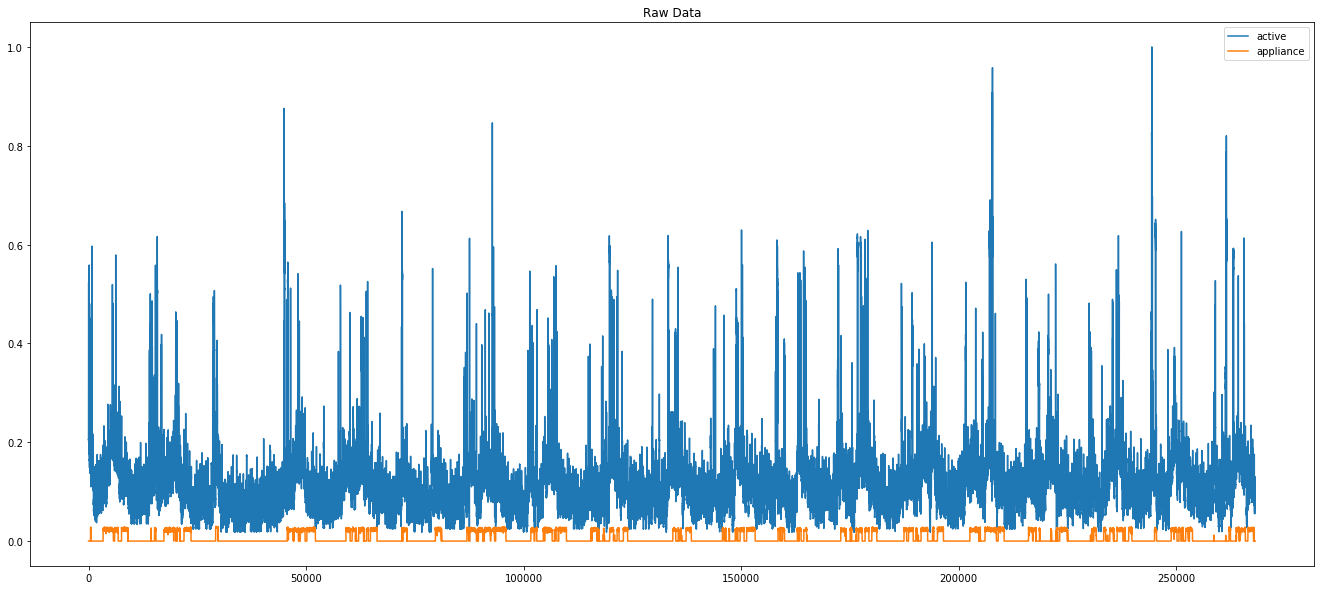

feature selection is done..
model fit is done..
min     0.247468
diff    0.129199
f5      0.060124
std     0.047071
max     0.040198
a9      0.031040
f6      0.028027
f4      0.027686
f7      0.026034
f3      0.025656
a0      0.024199
q0      0.023588
f8      0.023320
f2      0.023289
a1      0.022118
a8      0.022057
f9      0.021681
f1      0.021539
q1      0.020932
q2      0.019312
a2      0.017725
a7      0.017649
a3      0.016824
a6      0.016458
a4      0.016208
a5      0.014816
mean    0.008140
f0      0.007640
dtype: float64


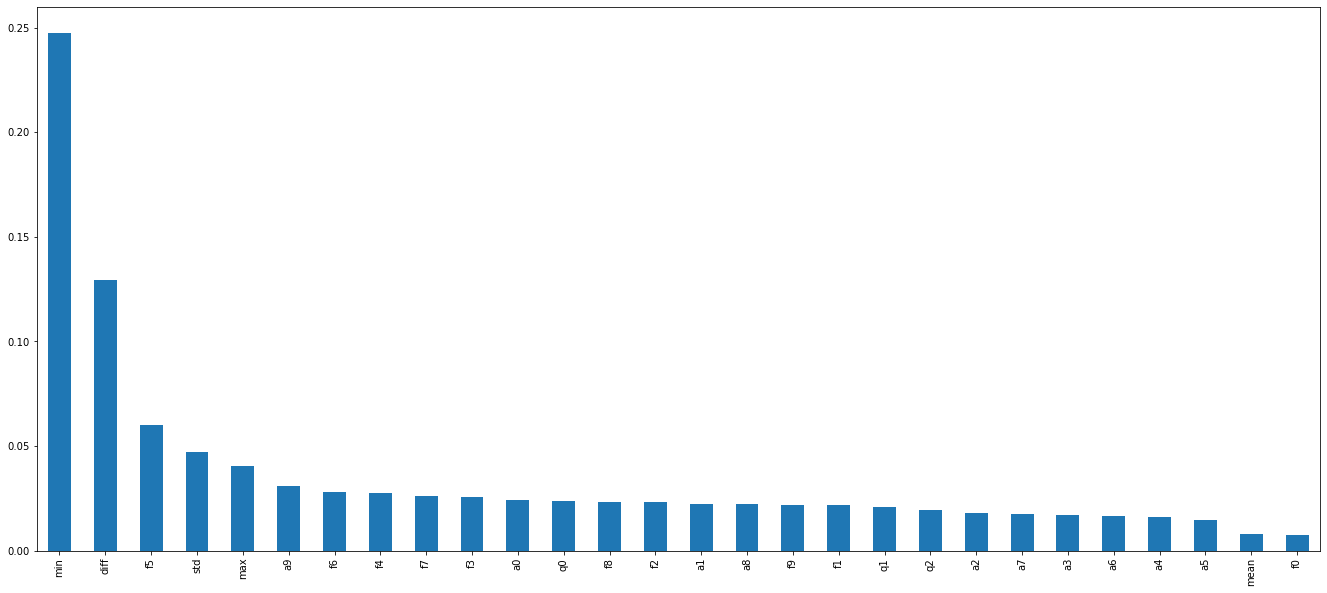

train on chunk is done..
elapsed time (secs) = 1223.6610605716705
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.9551972715293389
============ Precision: 0.5514633491452609
============ Accuracy: 0.6319097222222222
============ F1 Score: 0.699236814480665
********************
[DRF-washing machine]
********************


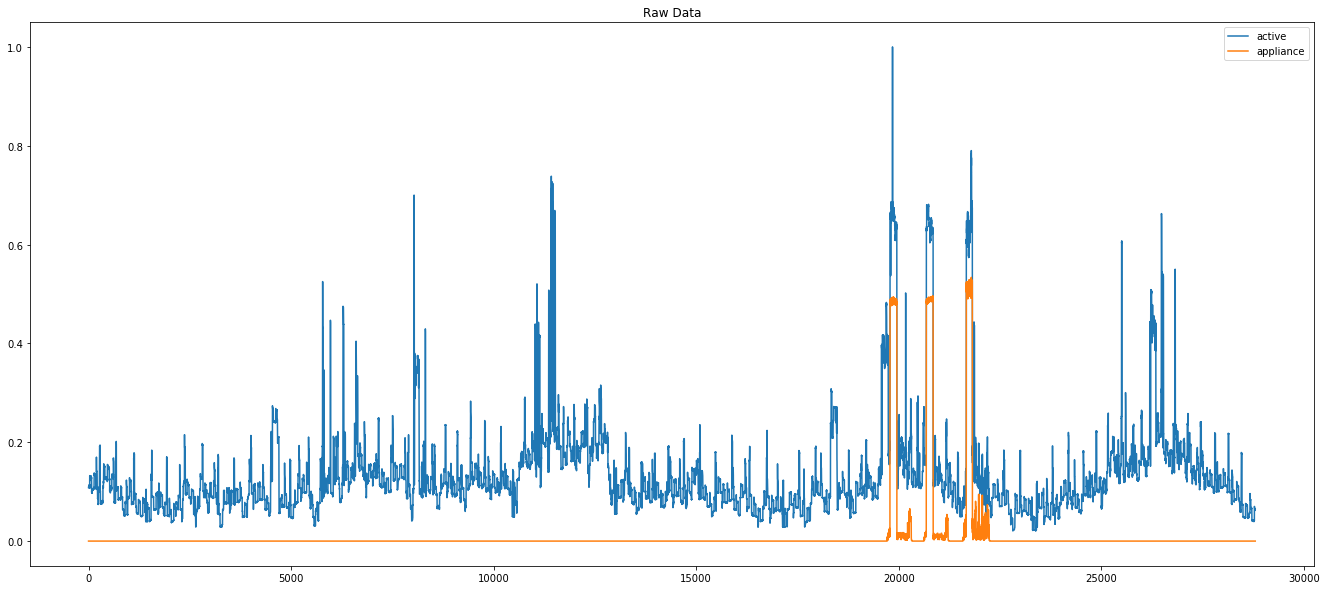

feature selection is done..
model fit is done..
min     0.873228
a9      0.025975
f5      0.020581
q0      0.019735
f0      0.010025
mean    0.009701
a0      0.007654
diff    0.006806
f3      0.003438
f7      0.003320
std     0.003148
max     0.002702
a1      0.001927
a8      0.001484
f9      0.001221
f1      0.001064
a6      0.000876
f4      0.000848
a4      0.000814
a2      0.000810
q2      0.000786
q1      0.000779
a7      0.000640
a3      0.000610
f6      0.000562
f2      0.000555
f8      0.000474
a5      0.000236
dtype: float64


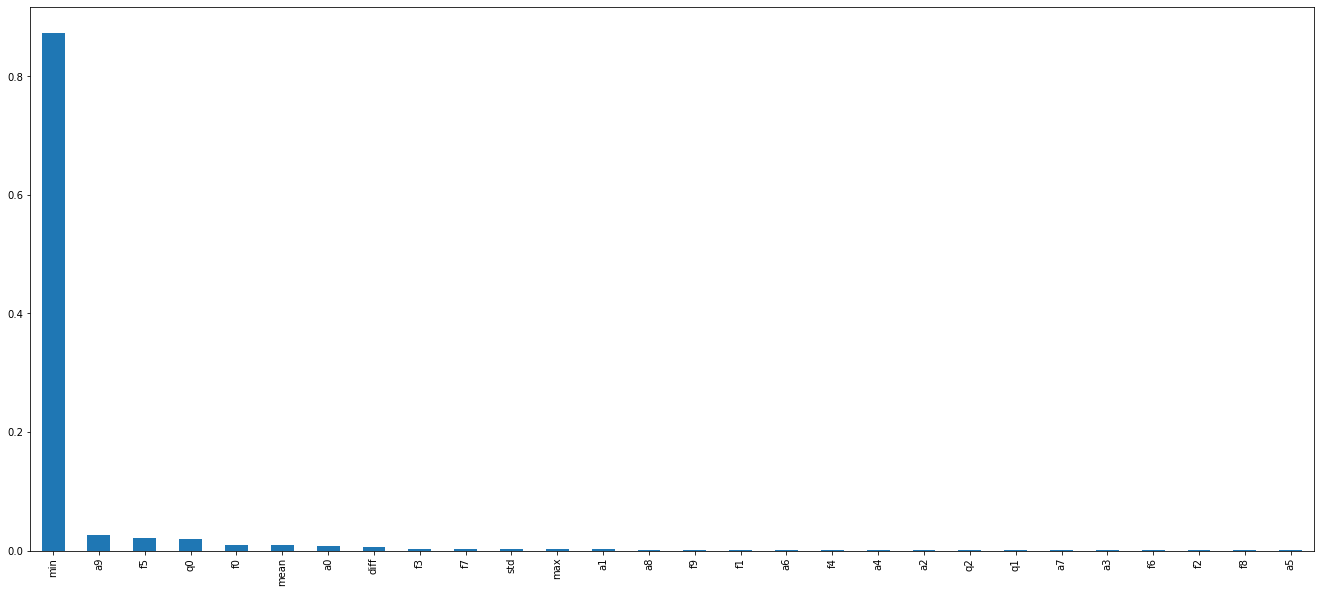

train on chunk is done..
elapsed time (secs) = 155.72877621650696
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.9283819628647215
============ Precision: 0.8536585365853658
============ Accuracy: 0.9848958333333333
============ F1 Score: 0.8894536213468869
********************
[DRF-rice cooker]
********************


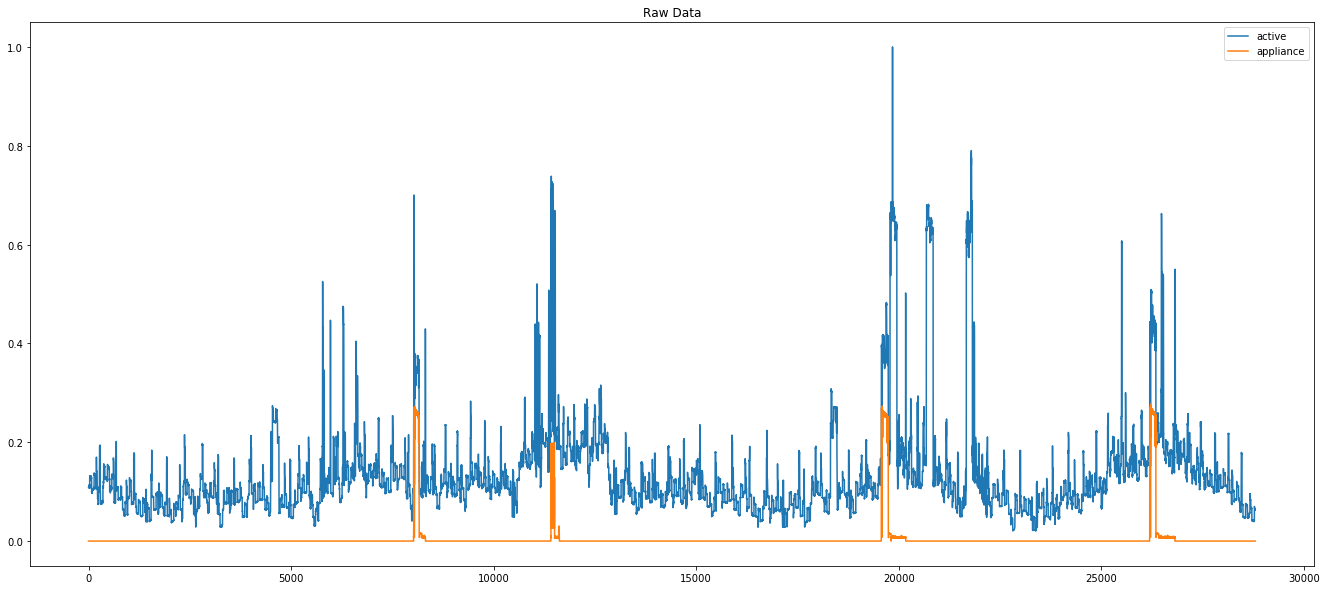

feature selection is done..
model fit is done..
a9      0.464465
max     0.258304
std     0.047248
diff    0.041096
a0      0.040416
min     0.032489
a1      0.017352
a8      0.013147
q1      0.011530
q2      0.009655
a7      0.007468
a5      0.005843
f5      0.005793
q0      0.004914
f4      0.004888
f7      0.004185
f3      0.004111
f6      0.004100
f1      0.003159
f9      0.003002
a2      0.002686
a3      0.002545
f2      0.002496
a6      0.002361
a4      0.002358
f8      0.002028
mean    0.001311
f0      0.001052
dtype: float64


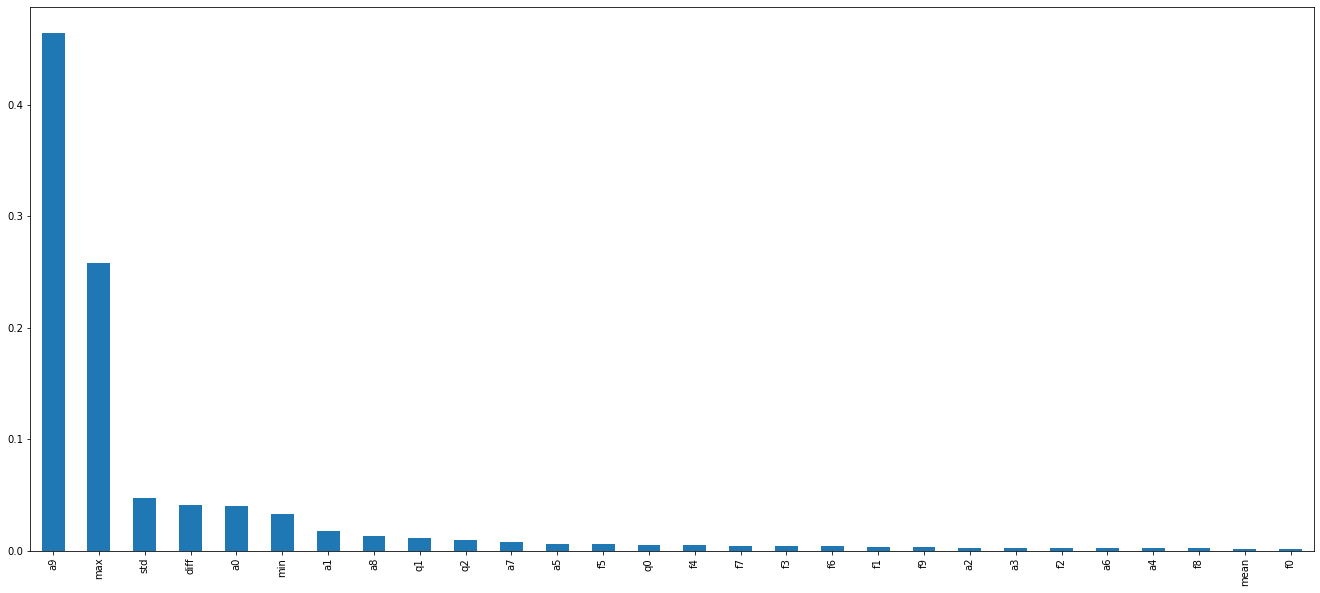

train on chunk is done..
elapsed time (secs) = 132.91415929794312
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.9389978213507625
============ Precision: 0.9016736401673641
============ Accuracy: 0.9895833333333334
============ F1 Score: 0.919957310565635
********************
[DRF-water filter]
********************


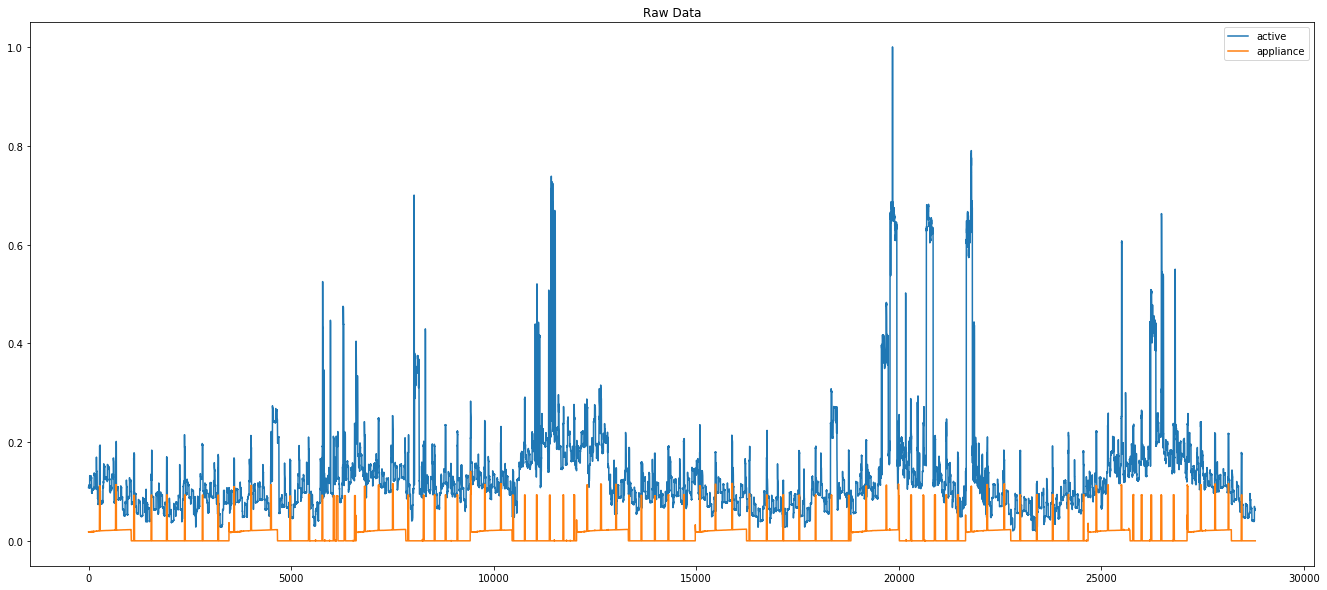

feature selection is done..
model fit is done..
a9      0.227743
diff    0.114944
a0      0.114072
max     0.085984
min     0.076039
std     0.039438
q0      0.034542
a8      0.027487
q2      0.027303
f5      0.023680
a1      0.023596
q1      0.017251
a7      0.015620
a2      0.014518
f6      0.013655
f4      0.012438
a3      0.012367
f1      0.012308
a6      0.011912
f7      0.011576
f3      0.011451
f9      0.011137
f2      0.010769
f8      0.010737
a4      0.010364
a5      0.010238
f0      0.009809
mean    0.009022
dtype: float64


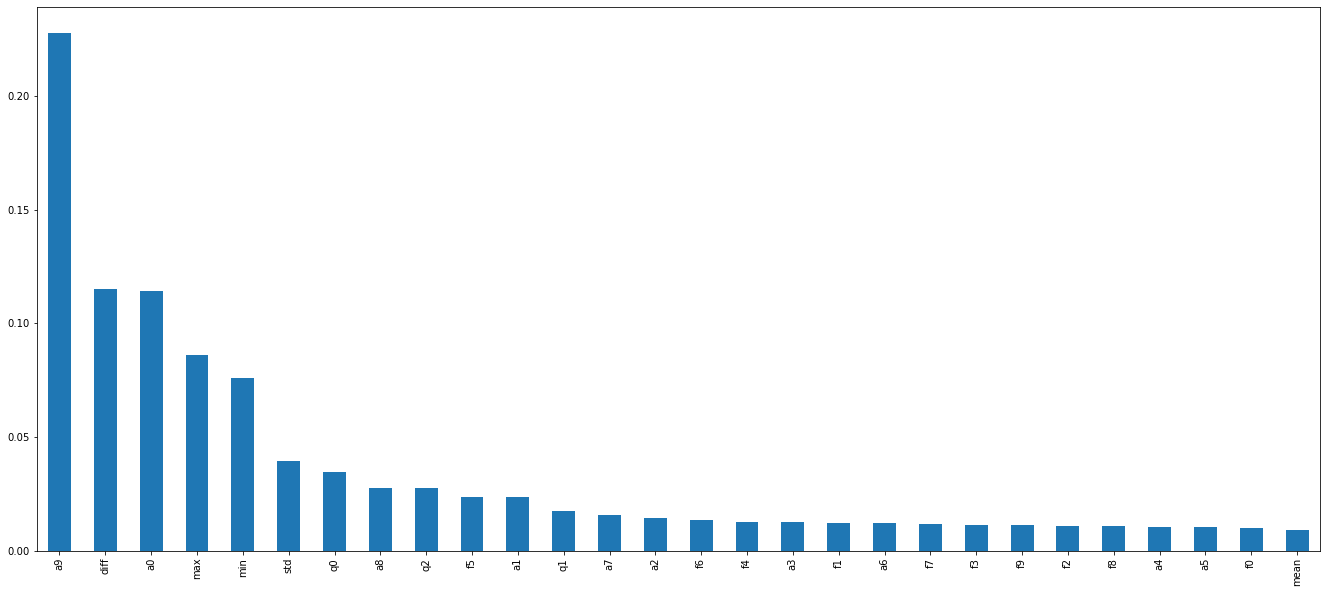

train on chunk is done..
elapsed time (secs) = 94.56615996360779
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.9968426868734707
============ Precision: 0.6660162430123405
============ Accuracy: 0.7787152777777778
============ F1 Score: 0.7985204388100281
********************
[DRF-microwave]
********************


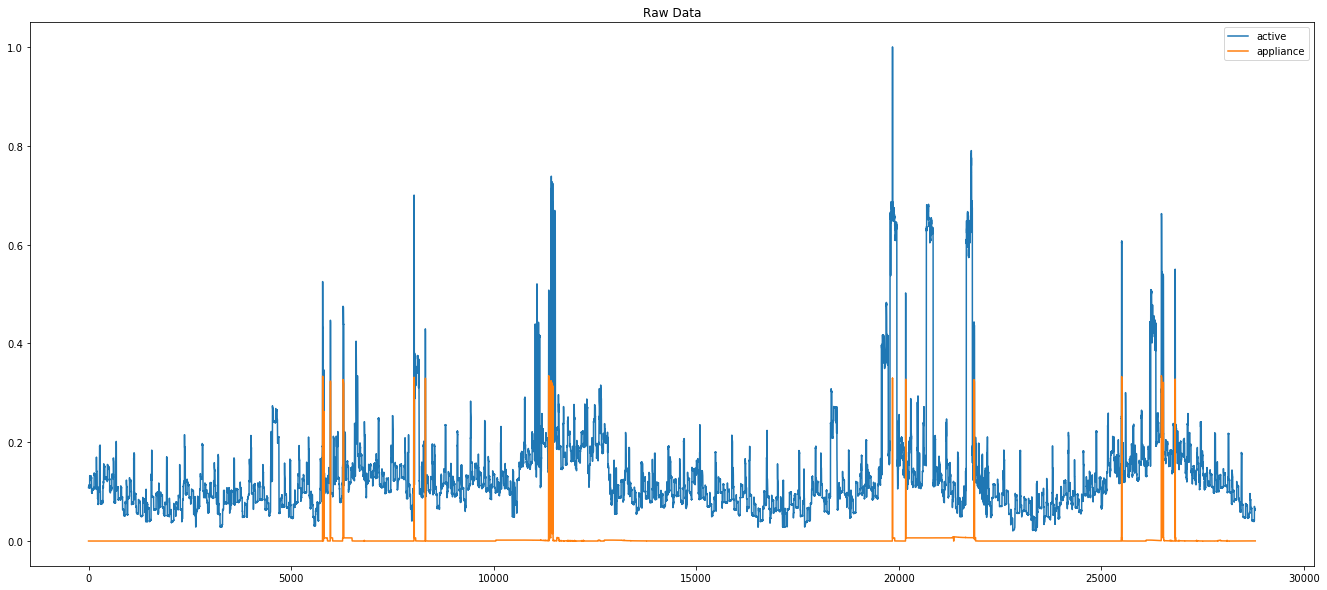

feature selection is done..
model fit is done..
diff    0.353191
a9      0.216508
std     0.064437
f5      0.047948
min     0.037133
max     0.031771
f4      0.027706
a8      0.023068
a1      0.019905
f6      0.019295
a6      0.018598
q0      0.018149
q1      0.015740
a7      0.011294
f8      0.010909
f3      0.010121
f9      0.009092
f2      0.008481
f1      0.008465
f7      0.008264
q2      0.007558
f0      0.006444
a0      0.006101
a3      0.005028
mean    0.004535
a2      0.003687
a5      0.003446
a4      0.003125
dtype: float64


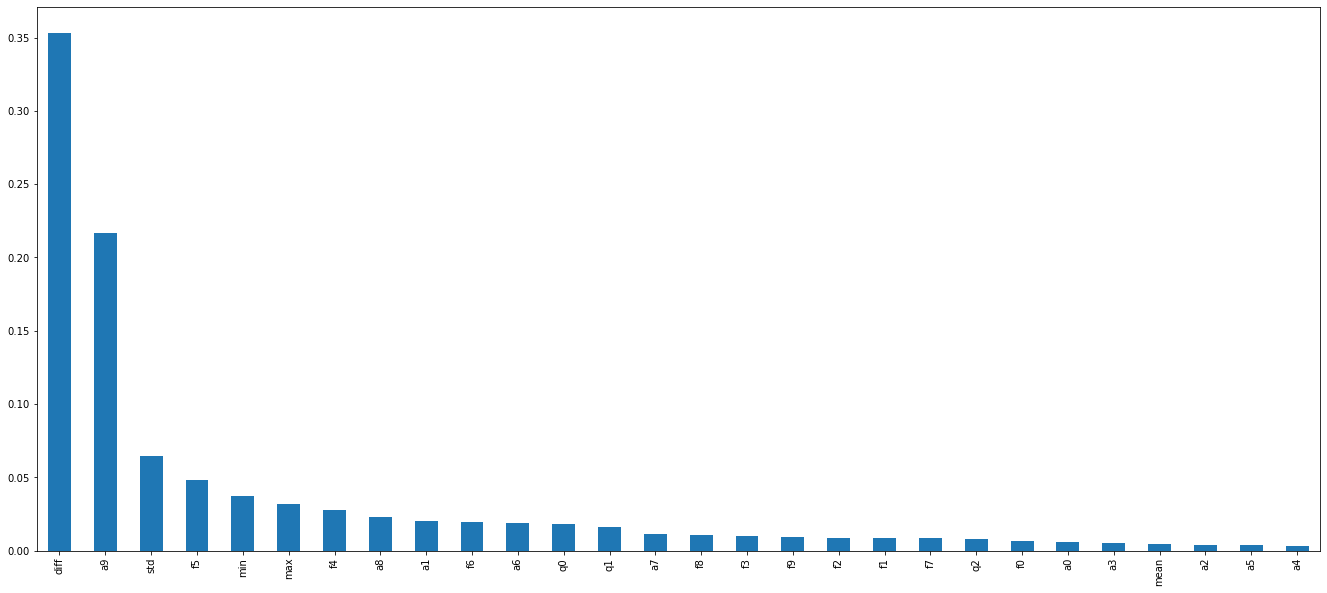

train on chunk is done..
elapsed time (secs) = 137.12883067131042
New sensible chunk: 28800
feature selection is done..
Disaggregation is done..
============ Recall: 0.951396861844623
============ Precision: 0.9370523935167735
============ Accuracy: 0.9897916666666666
============ F1 Score: 0.9441701481200152


In [6]:
dataset.set_window(start=T_S, end=T_E)

train_elec = dataset.buildings[HOME_ID].elec
train_mains = train_elec.all_meters()[0] # The aggregated meter that provides the input

result = []

for aname in appliances:
    
    train_meter = train_elec.submeters()[aname]
    
   
    models = {}
    
    models['DRF-' + aname] = DTDisaggregator(algorithm='DRF', use_feature=True, reactive=False)
    
    for mname, model in models.items():
        
        try:
            
            print("*"*20)
            print("[" + mname + "]") 
            print("*" *20)

            start = time.time()
            model.train(train_mains, train_meter, epochs=EPOCHS, sample_period=TRAIN_SAMPLE_PERIOD)
            end = time.time()            
            print("elapsed time (secs) = " + str(end-start))
            
            pred = disaggregate(dataset, model, aname, P_S, P_E, True)
            result.append(pred)

        except Exception as e:
            print('train & test error', e)

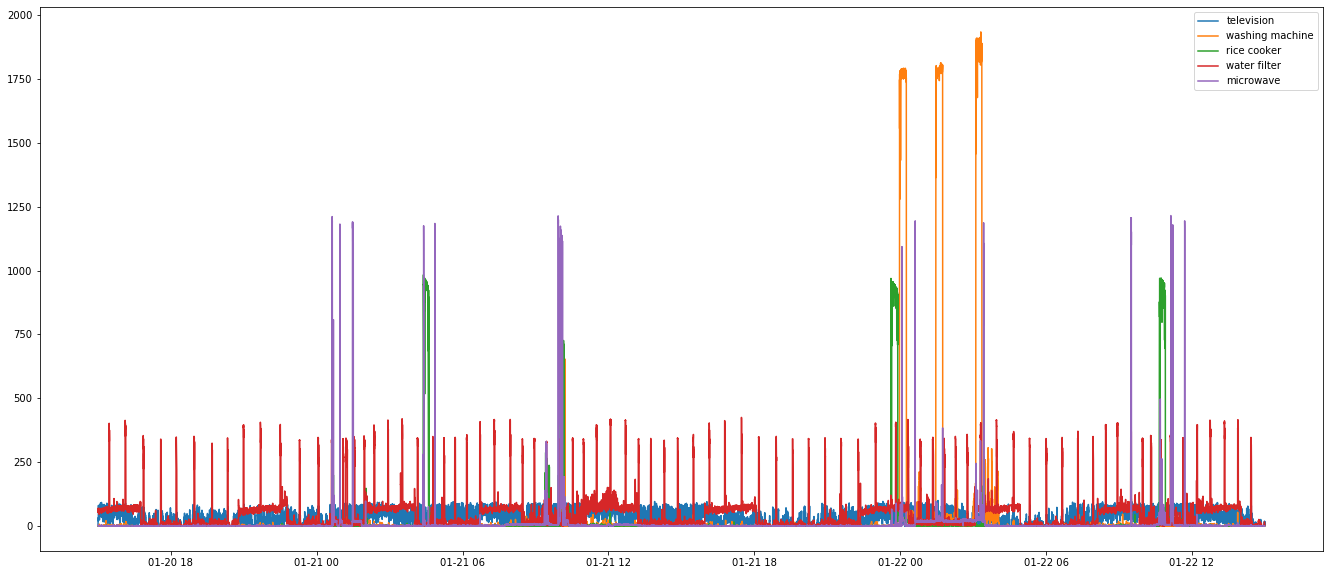

In [7]:
for i in range(len(result)):
    plt.plot(result[i].power_series_all_data())
    
plt.legend(['television', 'washing machine', 'rice cooker', 'water filter', 'microwave'])    
plt.show()  

## [3] Performance Evaluation with noise (base load and strong load)

- Description
  Base loads, which are the electricity consumed by appliances such as refrigerators that are always running, and strong loads, which are 
  usually caused by heating or cooling appliances such as air conditioners that consume much more power than other appliances, affect NILM 
  model development. These two loads impair model development because they act as noise during model training.
  This experiment is executed to determine whether the proposed method performed well in the presence of both base and strong loads.
- Dataset : the UK-DALE dataset featured both base loads and strong loads from unknown appliances (The Enertalk dataset did not contain many occurrences of base or strong loads)

In [8]:
###############################################################
# Common
###############################################################
TRAIN_SAMPLE_PERIOD = 6
TEST_SAMPLE_PERIOD = 6

EPOCHS = 1

DATA_FILE = 'data/ukdale.h5'

T_S = '2013-01-01'
T_E = '2013-03-31'
P_S = '2013-04-01'
P_E = '2013-04-30'

HOME_ID = 4
appliances = ['television', 'kettle', 'boiler', 'freezer', 'washing machine']

********************
[DRF-television]
********************


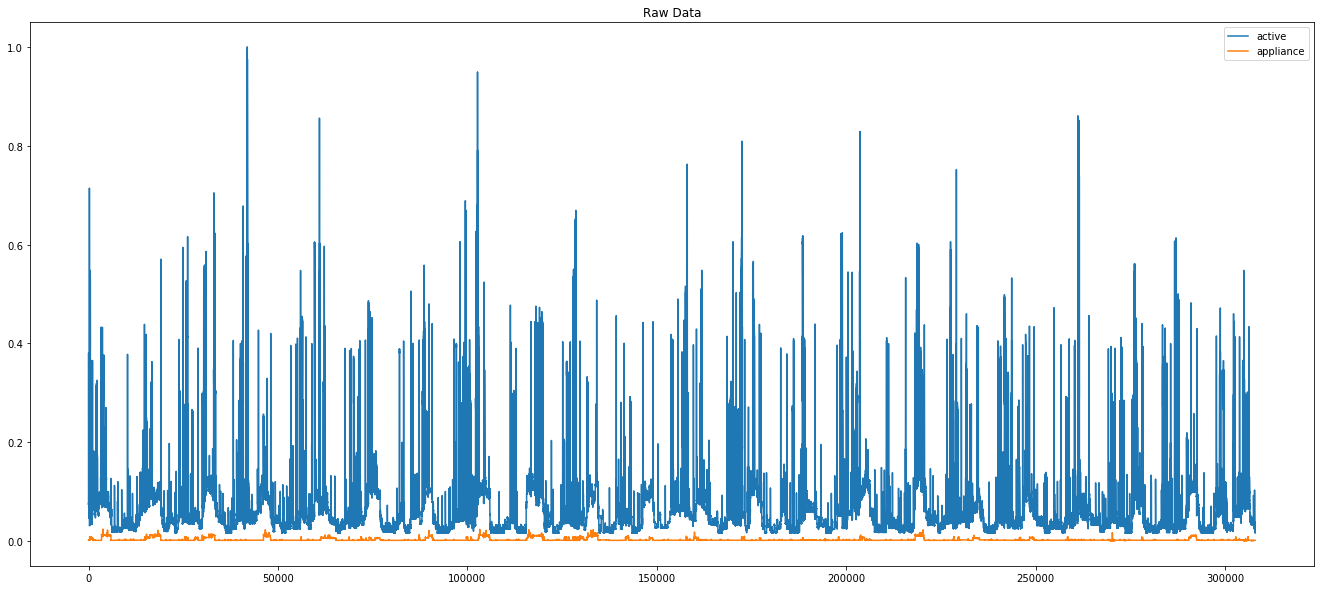

feature selection is done..
model fit is done..
min     0.438401
max     0.077021
diff    0.059198
q2      0.052268
q0      0.048658
std     0.041018
q1      0.029981
f5      0.018360
a9      0.017030
f0      0.016756
mean    0.016260
a0      0.013541
a8      0.012907
a1      0.012241
f9      0.012150
f1      0.012120
a2      0.011244
a7      0.011240
a3      0.010824
a6      0.010624
a4      0.010330
f3      0.009958
f7      0.009884
f8      0.009787
f2      0.009758
f4      0.009713
f6      0.009580
a5      0.009149
dtype: float64


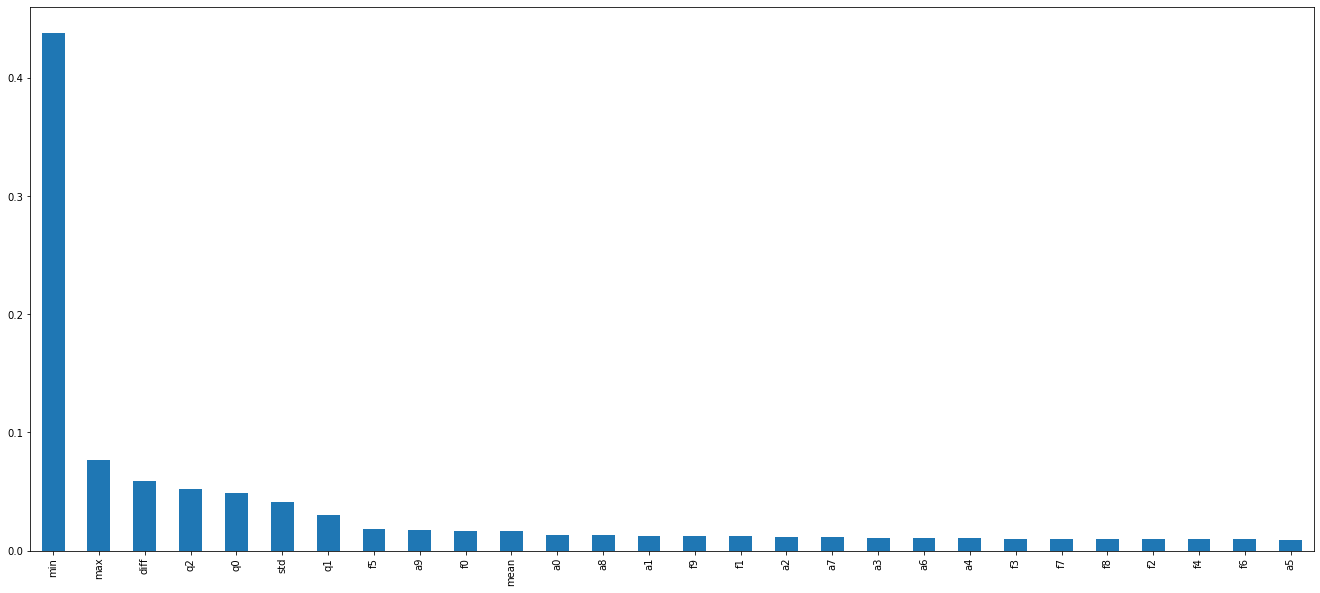

train on chunk is done..
elapsed time (secs) = 923.22736287117
New sensible chunk: 66963
feature selection is done..
New sensible chunk: 350263
feature selection is done..
Disaggregation is done..
============ Recall: 0.9999232948689062
============ Precision: 0.9998969301977741
============ Accuracy: 0.9998202408772245
============ F1 Score: 0.9999101123595505
********************
[DRF-kettle]
********************


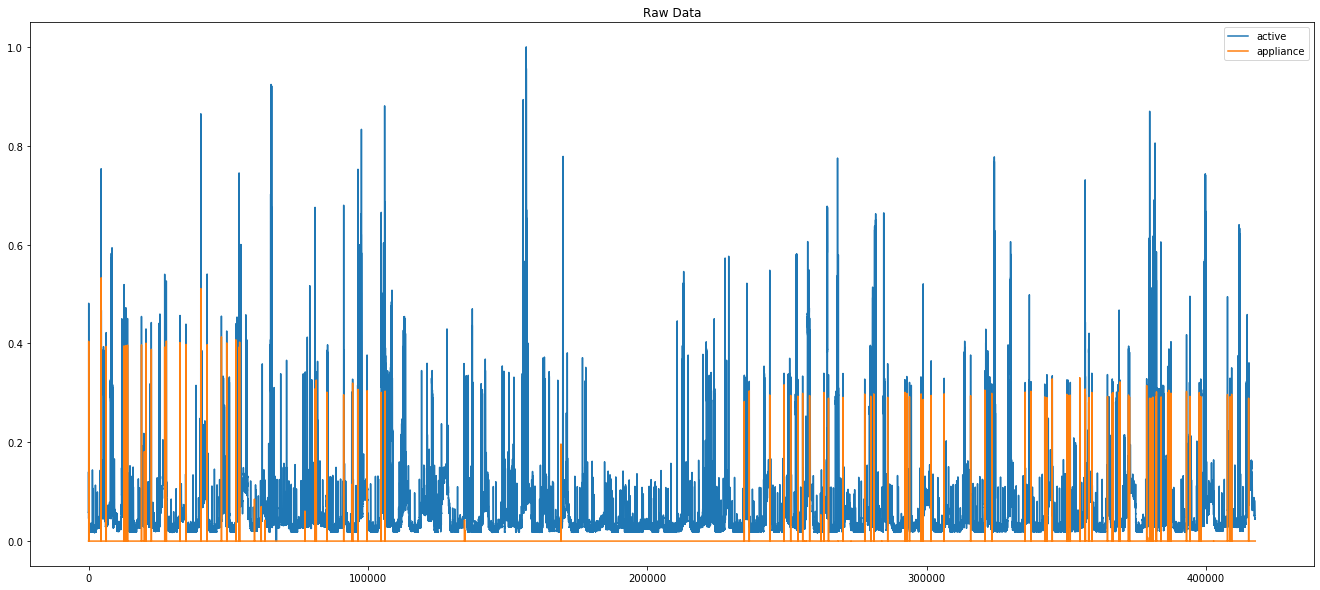

feature selection is done..
model fit is done..
a9      0.147746
diff    0.122949
max     0.095308
q0      0.094299
a8      0.073398
min     0.065321
std     0.036491
q1      0.030864
q2      0.030684
a7      0.027853
f5      0.023280
a0      0.022854
a2      0.019195
mean    0.019054
a1      0.018580
f0      0.018470
a3      0.017339
f9      0.016197
f1      0.015797
a6      0.015236
a5      0.012395
a4      0.012210
f3      0.011495
f6      0.010954
f7      0.010950
f8      0.010456
f2      0.010433
f4      0.010191
dtype: float64


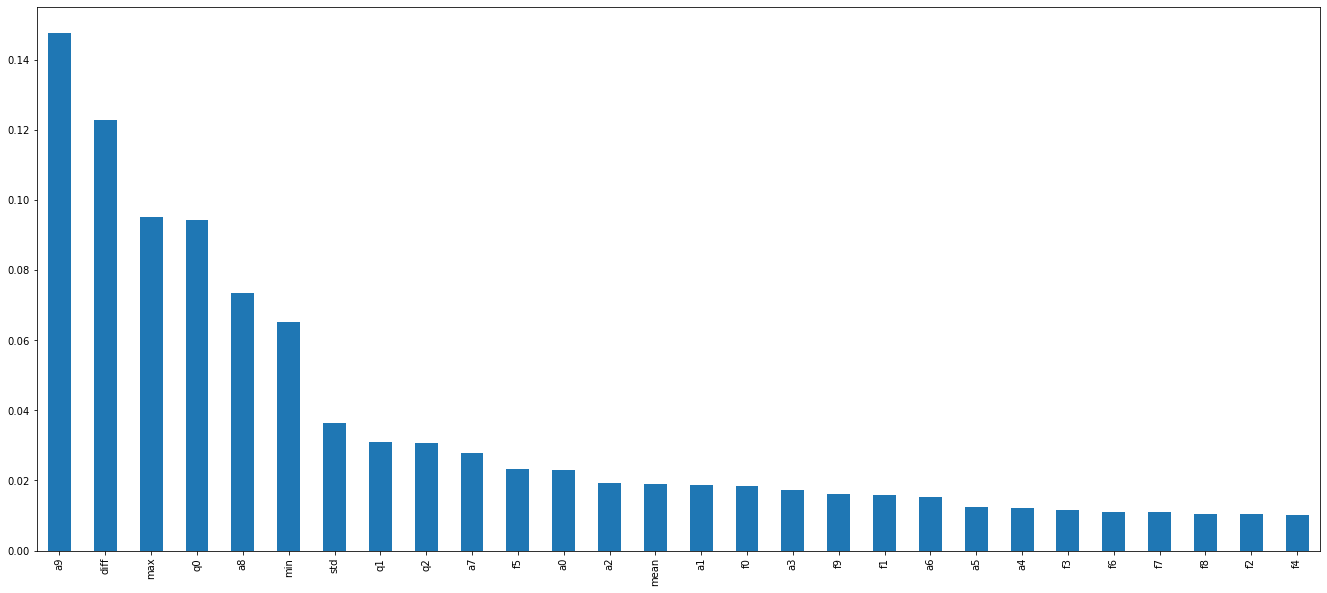

train on chunk is done..
elapsed time (secs) = 1694.0060334205627
New sensible chunk: 66963
feature selection is done..
New sensible chunk: 350263
feature selection is done..
Disaggregation is done..
============ Recall: 0.1816249795651463
============ Precision: 0.245687748783724
============ Accuracy: 0.9596524656959674
============ F1 Score: 0.20885421562176895
********************
[DRF-boiler]
********************


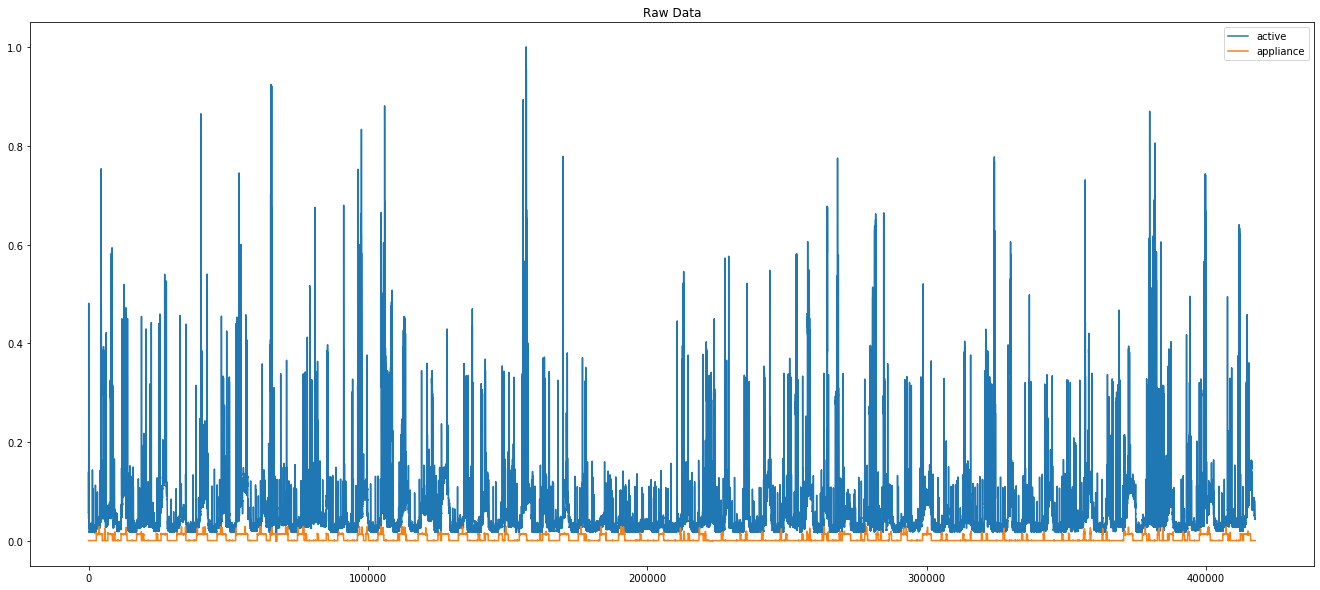

feature selection is done..
model fit is done..
min     0.398671
max     0.068853
diff    0.054252
std     0.049548
q2      0.039801
q0      0.038744
q1      0.025919
f5      0.023964
a9      0.021033
mean    0.017702
f0      0.017065
a0      0.017055
f1      0.016914
f9      0.016748
a8      0.015417
a1      0.014956
f2      0.014854
f8      0.014850
f6      0.014264
f7      0.014244
f3      0.014229
f4      0.014202
a7      0.013804
a2      0.013674
a3      0.013080
a6      0.012964
a4      0.012782
a5      0.010410
dtype: float64


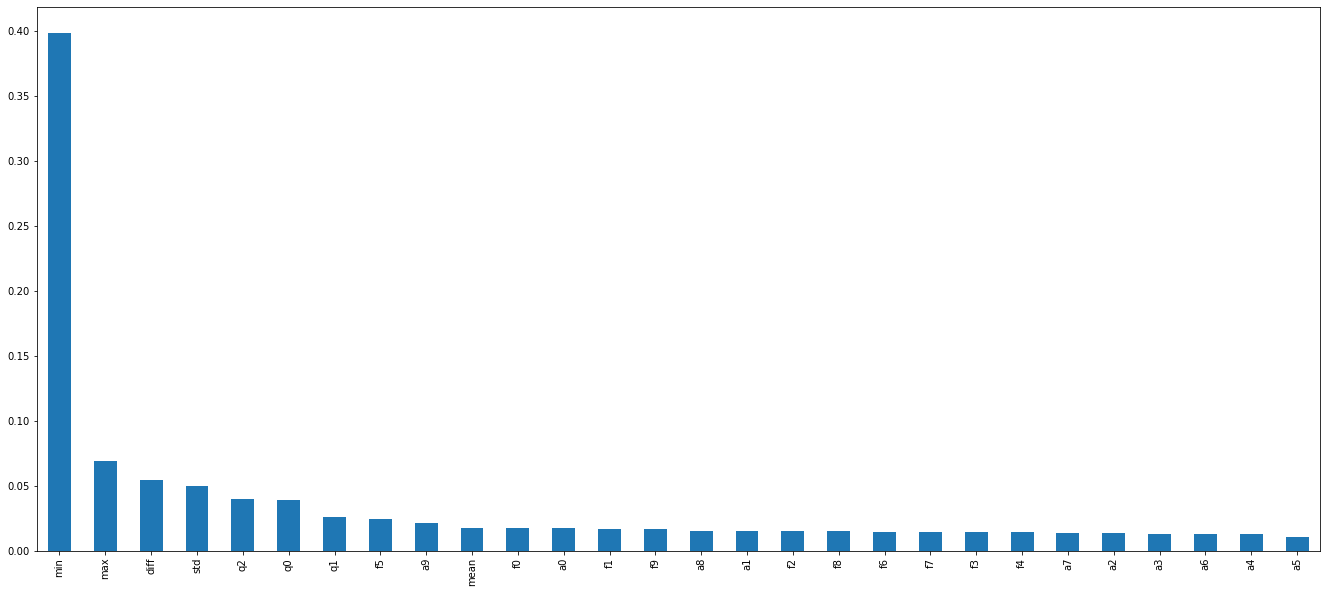

train on chunk is done..
elapsed time (secs) = 1146.9630818367004
New sensible chunk: 66963
feature selection is done..
New sensible chunk: 350263
feature selection is done..
Disaggregation is done..
============ Recall: 0.9443156853715433
============ Precision: 0.9846343978525941
============ Accuracy: 0.9776427587033375
============ F1 Score: 0.9640536728606772
********************
[DRF-freezer]
********************


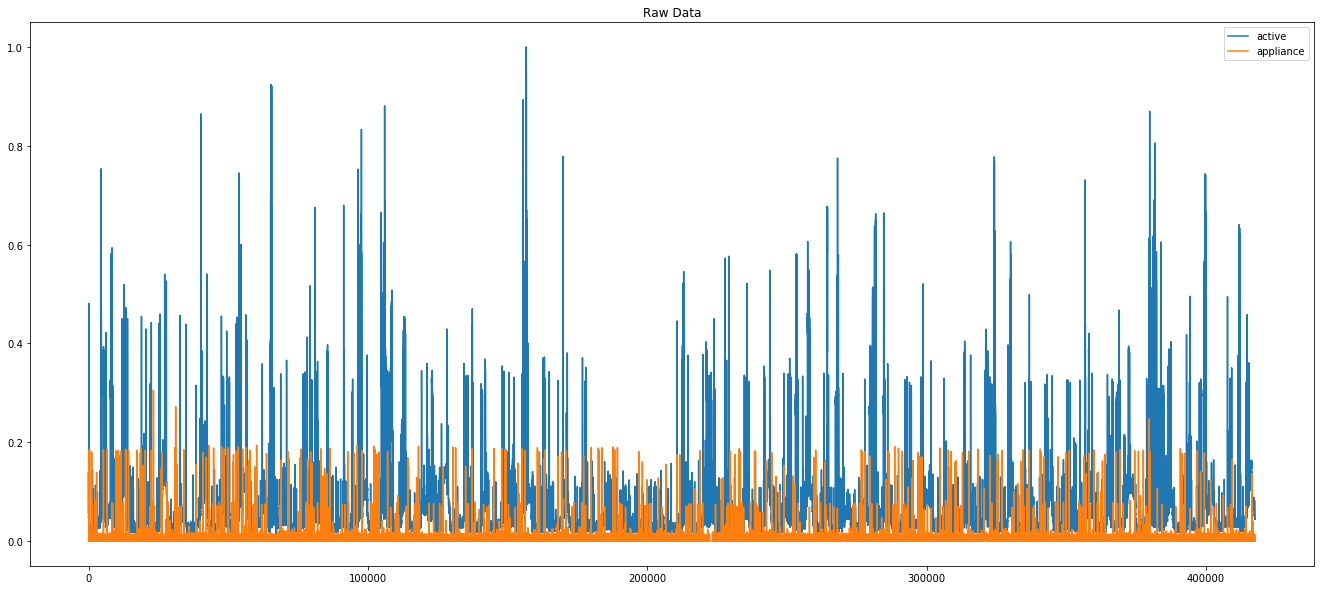

feature selection is done..
model fit is done..
a9      0.237036
std     0.055673
diff    0.054490
min     0.048129
max     0.046186
a8      0.040932
mean    0.037216
f0      0.036065
q2      0.035049
q0      0.033108
f5      0.030674
f2      0.025058
f1      0.025051
f8      0.024855
f9      0.024635
f6      0.022878
f4      0.022256
f7      0.022140
f3      0.021130
a0      0.021039
q1      0.020400
a1      0.020280
a7      0.017733
a6      0.016183
a2      0.016148
a4      0.015715
a3      0.015202
a5      0.014739
dtype: float64


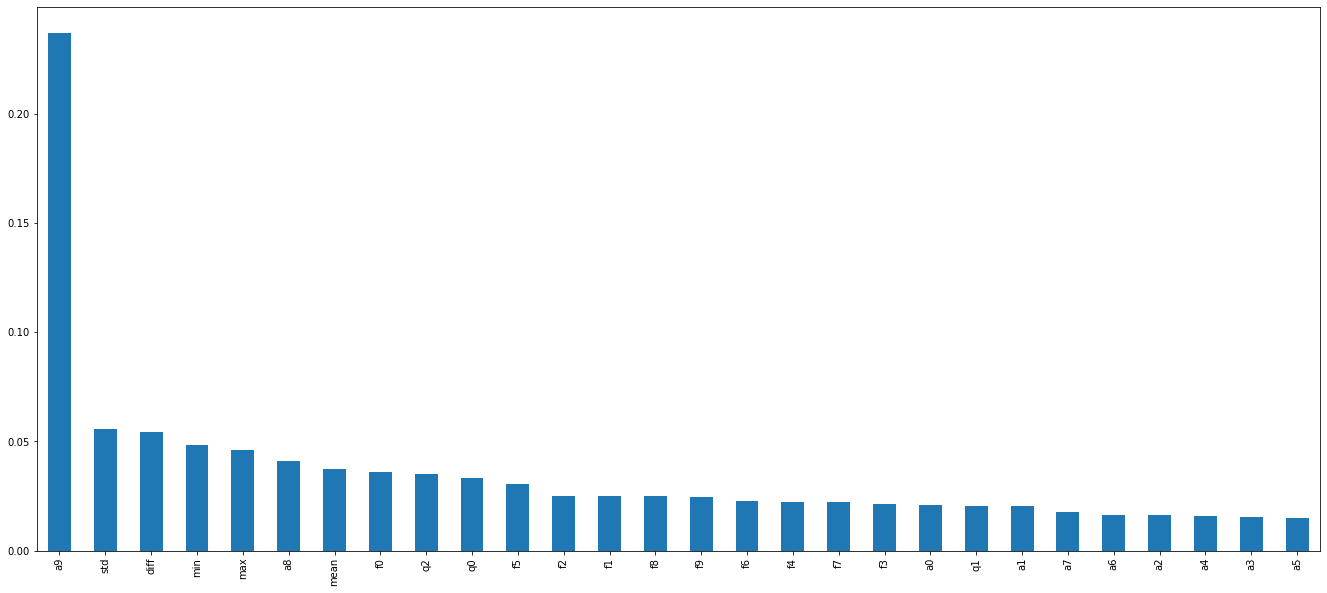

train on chunk is done..
elapsed time (secs) = 1091.499769449234
New sensible chunk: 66963
feature selection is done..
New sensible chunk: 350263
feature selection is done..
Disaggregation is done..
============ Recall: 0.9609804284744088
============ Precision: 0.7248375279410547
============ Accuracy: 0.8589082629276769
============ F1 Score: 0.826369983217171
********************
[DRF-washing machine]
********************


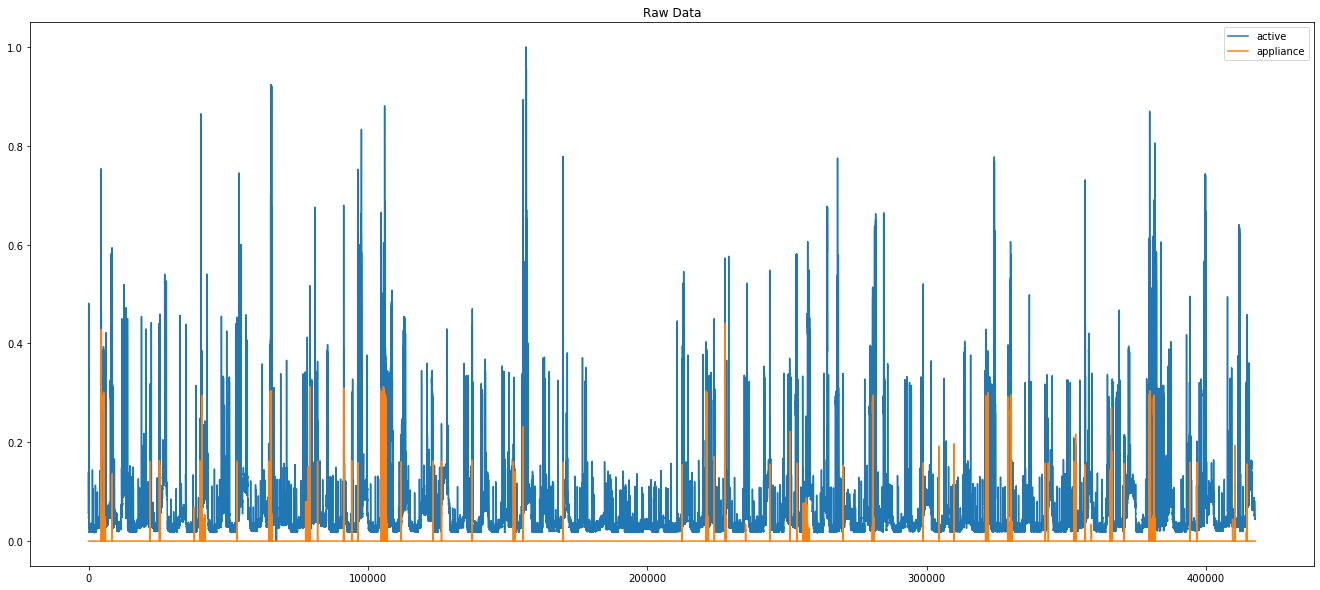

feature selection is done..
model fit is done..
diff    0.313889
mean    0.117113
f0      0.100636
min     0.072921
std     0.072163
max     0.060712
q0      0.032963
q1      0.029390
a9      0.028461
q2      0.024475
a8      0.021869
a7      0.011780
a2      0.009748
a0      0.009244
f5      0.008983
a4      0.008540
a6      0.008467
a3      0.007666
a1      0.007502
a5      0.006897
f9      0.006753
f1      0.006452
f8      0.005794
f6      0.005773
f2      0.005643
f4      0.005602
f3      0.005328
f7      0.005235
dtype: float64


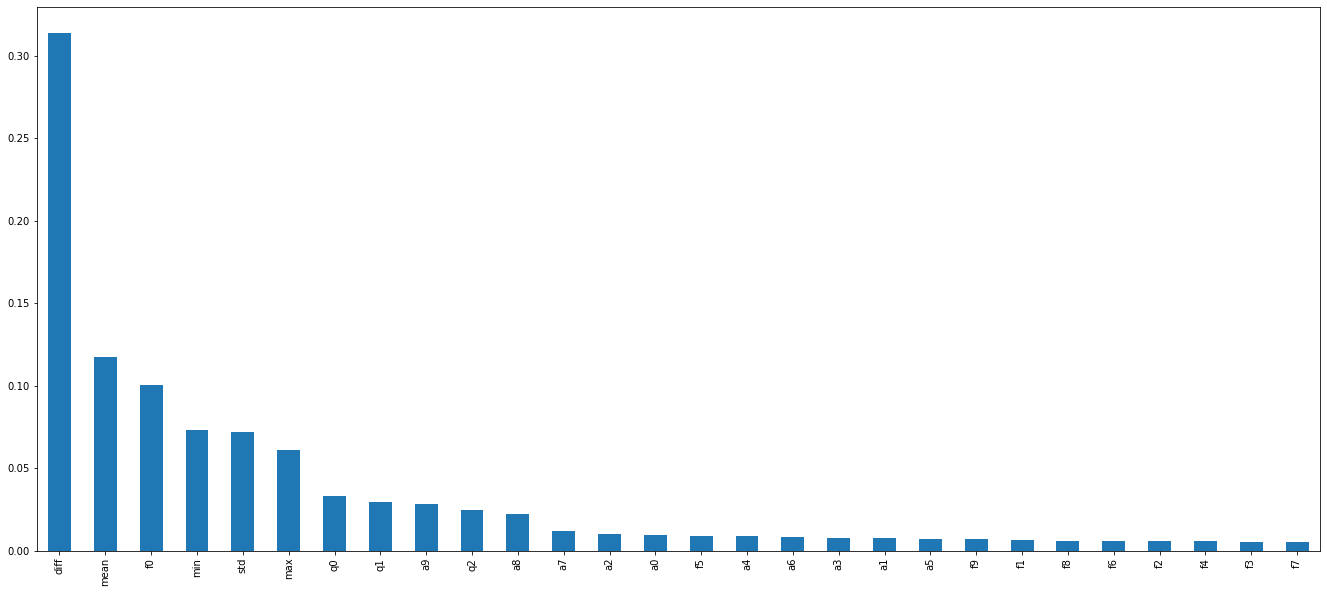

train on chunk is done..
elapsed time (secs) = 1247.6793103218079
New sensible chunk: 66963
feature selection is done..
New sensible chunk: 350263
feature selection is done..
Disaggregation is done..
============ Recall: 0.5335363163004148
============ Precision: 0.542635311013374
============ Accuracy: 0.9502378812391395
============ F1 Score: 0.5380473478106087


In [10]:
dataset = DataSet(DATA_FILE)
dataset.set_window(start=T_S, end=T_E)

train_elec = dataset.buildings[HOME_ID].elec
train_mains = train_elec.all_meters()[0] # The aggregated meter that provides the input

for aname in appliances:
    
    train_meter = train_elec.submeters()[aname]
    
    models = {}
    
    models['DRF-' + aname] = DTDisaggregator(algorithm='DRF', use_feature=True, reactive=False)
    
    for mname, model in models.items():
        
        try:
            
            print("*"*20)
            print("[" + mname + "]") 
            print("*" *20)

            start = time.time()
            model.train(train_mains, train_meter, epochs=EPOCHS, sample_period=TRAIN_SAMPLE_PERIOD)
            end = time.time()            
            print("elapsed time (secs) = " + str(end-start))

            disaggregate(dataset, model, aname, P_S, P_E, True)
        
        except Exception as e:
            print('train & test error', e)

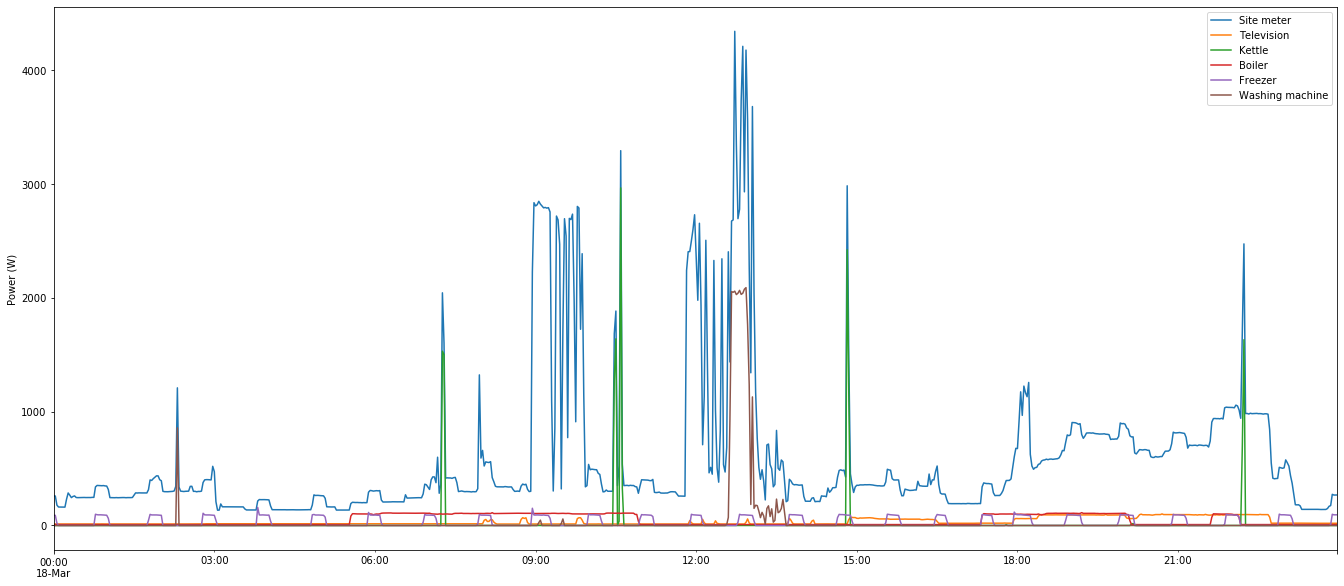

In [14]:
dataset.set_window(start='2013-03-18', end='2013-03-19')
train_elec.plot()
plt.show()